In [ ]:
import pandas as pd
import seaborn as sns
base_folder = '/sonas-hs/gillis/hpc/data/lohia/'

In [2]:
tissue_size = { 'Adipose_Subcutaneous' : 581,
              'Adipose_Visceral_Omentum' : 469,
                         'Adrenal_Gland' : 233,
                          'Artery_Aorta' : 387,
                       'Artery_Coronary' : 213,
                         'Artery_Tibial' : 584,
                        'Brain_Amygdala' : 129,
  'Brain_Anterior_cingulate_cortex_BA24' : 147,
           'Brain_Caudate_basal_ganglia' : 194,
           'Brain_Cerebellar_Hemisphere' : 175,
                      'Brain_Cerebellum' : 209,
                          'Brain_Cortex' : 205,
              'Brain_Frontal_Cortex_BA9' : 175,
                     'Brain_Hippocampus' : 165,
                    'Brain_Hypothalamus' : 170,
 'Brain_Nucleus_accumbens_basal_ganglia' : 202,
           'Brain_Putamen_basal_ganglia' : 170,
        'Brain_Spinal_cord_cervical_c-1' : 126,
                'Brain_Substantia_nigra' : 114,
                 'Breast_Mammary_Tissue' : 396,
            'Cells_Cultured_fibroblasts' : 581,
     'Cells_EBV-transformed_lymphocytes' : 147,
                         'Colon_Sigmoid' : 318,
                      'Colon_Transverse' : 368,
   'Esophagus_Gastroesophageal_Junction' : 330,
                      'Esophagus_Mucosa' : 497,
                  'Esophagus_Muscularis' : 465,
                'Heart_Atrial_Appendage' : 372,
                  'Heart_Left_Ventricle' : 386,
                         'Kidney_Cortex' : 73,
                                 'Liver' : 208,
                                  'Lung' : 515,
                  'Minor_Salivary_Gland' : 144,
                       'Muscle_Skeletal' : 706,
                          'Nerve_Tibial' : 532,
                                 'Ovary' : 167,
                              'Pancreas' : 305,
                             'Pituitary' : 237,
                              'Prostate' : 221,
       'Skin_Not_Sun_Exposed_Suprapubic' : 517,
            'Skin_Sun_Exposed_Lower_leg' : 605,
        'Small_Intestine_Terminal_Ileum' : 174,
                                'Spleen' : 227,
                               'Stomach' : 324,
                                'Testis' : 322,
                               'Thyroid' : 574,
                                'Uterus' : 129,
                                'Vagina' : 141,
                           'Whole_Blood' : 670 }

In [6]:
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt


In [26]:
tissue_list_sig = open(f"{base_folder}/eQTL/GTEx_Analysis_v8_eQTL/tissue.txt", "r")
auc_each_tissue = []
for tissue in tissue_list_sig:
    try:
        simlarity_type = "jaccard"
        t = pd.read_csv(f'{base_folder}/eQTL/all_pairs_3/{tissue.split()[0]}_90_auc_allchr{simlarity_type}.txt', sep= '\t', names=['auc_hic', 'auc_cn', 'tp', 'tn', 'diff'])
        t['tissue'] = tissue.split()[0].split('.')[0]
        t['samples'] = t['tp'] + t['tn']
        t['tissue_size'] = tissue_size[tissue.split()[0].split('.')[0]]
        auc_each_tissue.append(t)
    except FileNotFoundError:
        pass

In [531]:
tissue_list_sig = open(f"{base_folder}/eQTL/GTEx_Analysis_v8_eQTL_all_associations/tissue.txt", "r")
auc_each_tissue = []
for tissue in tissue_list_sig:
    try:
        simlarity_type = "jaccard" 
        t = pd.read_hdf(f'{base_folder}/eQTL/all_pairs_3/{tissue.split()[0]}_same_tad_1.hdf')
        #print (t)
        t['tissue'] = tissue.split()[0].split('.')[0]
        #t['samples'] = t['tp'] + t['tn']
        t['tissue_size'] = tissue_size[tissue.split()[0].split('.')[0]]
        auc_each_tissue.append(t)
    except FileNotFoundError:
        pass

In [557]:
tissue_list_sig = open(f"{base_folder}/eQTL/GTEx_Analysis_v8_eQTL_all_associations/tissue.txt", "r")
auc_each_tissue = []
for tissue in tissue_list_sig:
    try:
        simlarity_type = "jaccard" 
        t = pd.read_hdf(f'{base_folder}/eQTL/all_pairs_3/{tissue.split()[0]}_enirch_between_tad_0.hdf')
        #print (t)
        t['tissue'] = tissue.split()[0].split('.')[0]
        #t['samples'] = t['tp'] + t['tn']
        #t['diff'] = t['diff'].astype('int')
        t['tissue_size'] = tissue_size[tissue.split()[0].split('.')[0]]
        auc_each_tissue.append(t)
    except FileNotFoundError:
        pass

In [579]:
tissue_list_sig = open(f"{base_folder}/eQTL/GTEx_Analysis_v8_eQTL/tissue.txt", "r")
auc_each_tissue = []
for tissue in tissue_list_sig:
    try:
        simlarity_type = "jaccard" 
        t = pd.read_hdf(f'{base_folder}/eQTL/all_pairs_3/{tissue.split()[0]}_90_chr_auc_{simlarity_type}_1.hdf')
        #print (t)
        t['tissue'] = tissue.split()[0].split('.')[0]
        t['samples'] = t['tp'] + t['tn']
        t['tissue_size'] = tissue_size[tissue.split()[0].split('.')[0]]
        auc_each_tissue.append(t)
    except FileNotFoundError:
        pass

In [580]:
auc_each_tissue = pd.concat(auc_each_tissue)
auc_each_tissue.sort_values(by='tissue_size', ascending=False, inplace=True)


In [36]:
auc_each_tissue['type_sim'] = 'j'

In [29]:
tmp = auc_each_tissue[auc_each_tissue['chr'] != 'X']

KeyError: 'chr'

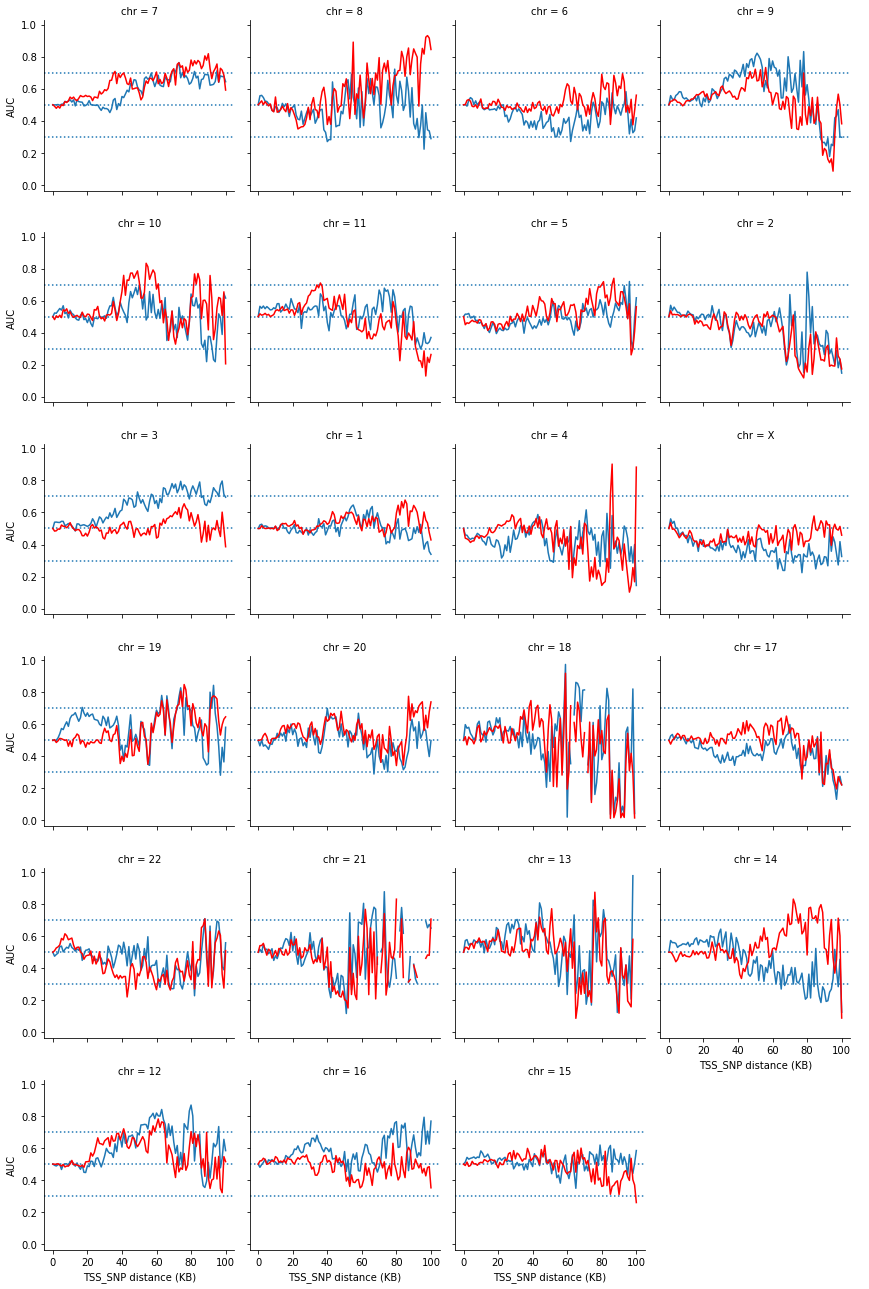

<Figure size 432x288 with 0 Axes>

In [364]:
#%matplotlib notebook
g = sns.FacetGrid(auc_each_tissue[auc_each_tissue['tissue']=='Whole_Blood'], col='chr', col_wrap=4)

#g = sns.FacetGrid(auc_each_tissue, col='chr', col_wrap=4)
g.map(plt.axhline, y=0.5, ls=":")
g.map(plt.axhline, y=0.7, ls=":")
g.map(plt.axhline, y=0.3, ls=":")
#g.map(sns.lineplot, 'diff', "auc_cn")
#g.map(sns.lineplot, 'diff', "auc_hic", color='red')
g.map(sns.lineplot, 'diff', "cn_auc", ci=None)
g.map(sns.lineplot, 'diff', "hi-c_auc", color='red', ci=None)
for ax in g.axes.flatten():
    ax.set_xlabel('TSS_SNP distance (KB)')
    ax.set_ylabel('AUC')
g.add_legend()
plt.show()
#figname = '/sonas-hs/gillis/hpc/data/lohia/figures/fig_chr6_each_tissue.pdf' 
figname = '/sonas-hs/gillis/hpc/data/lohia/figures/del.pdf' 
#savefig('sample.pdf')
plt.savefig(figname, bbox_inches='tight', dpi=300)

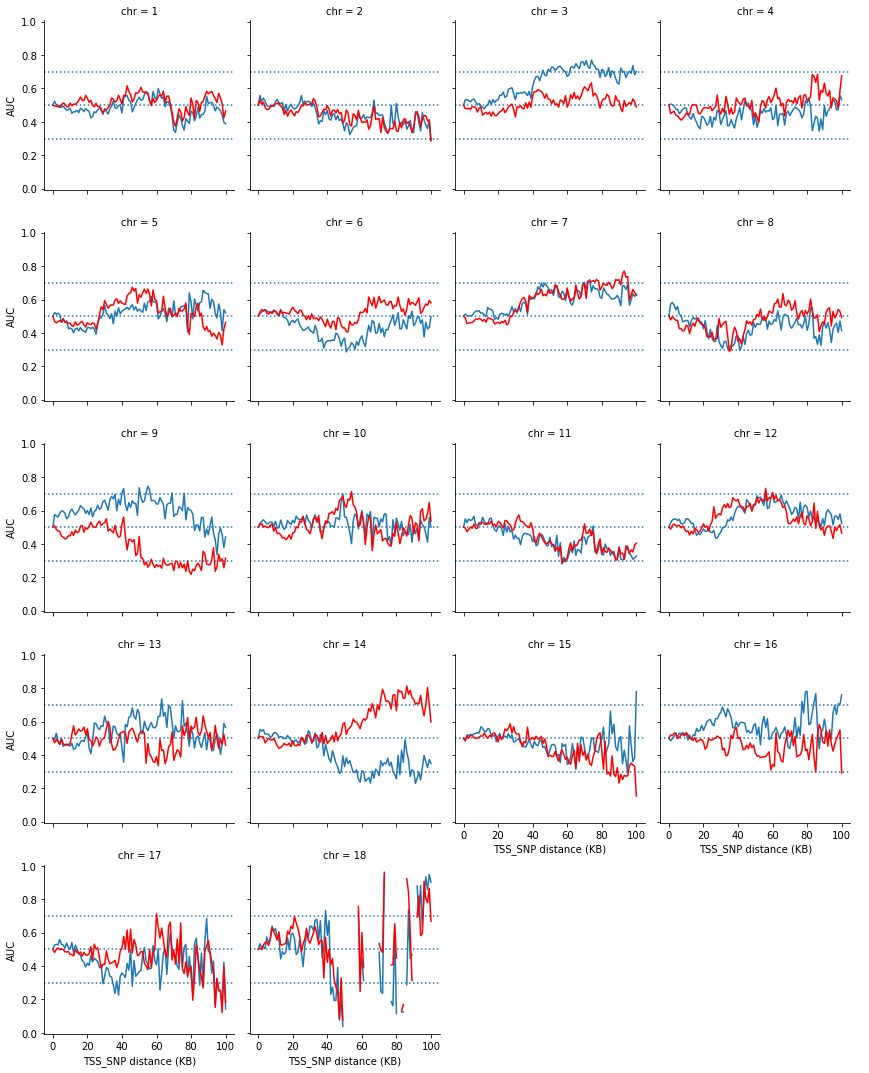

<Figure size 432x288 with 0 Axes>

In [318]:
#%matplotlib notebook
#g = sns.FacetGrid(auc_each_tissue[auc_each_tissue['chr']==6], col='tissue', col_wrap=4)

g = sns.FacetGrid(auc_each_tissue, col='chr', col_wrap=4)
g.map(plt.axhline, y=0.5, ls=":")
g.map(plt.axhline, y=0.7, ls=":")
g.map(plt.axhline, y=0.3, ls=":")
#g.map(sns.lineplot, 'diff', "auc_cn")
#g.map(sns.lineplot, 'diff', "auc_hic", color='red')
g.map(sns.lineplot, 'diff', "cn_auc", ci=None)
g.map(sns.lineplot, 'diff', "hi-c_auc", color='red', ci=None)
for ax in g.axes.flatten():
    ax.set_xlabel('TSS_SNP distance (KB)')
    ax.set_ylabel('AUC')
g.add_legend()
plt.show()
#figname = '/sonas-hs/gillis/hpc/data/lohia/figures/fig_chr6_each_tissue.pdf' 
figname = '/sonas-hs/gillis/hpc/data/lohia/figures/del.pdf' 
#savefig('sample.pdf')
plt.savefig(figname, bbox_inches='tight', dpi=300)

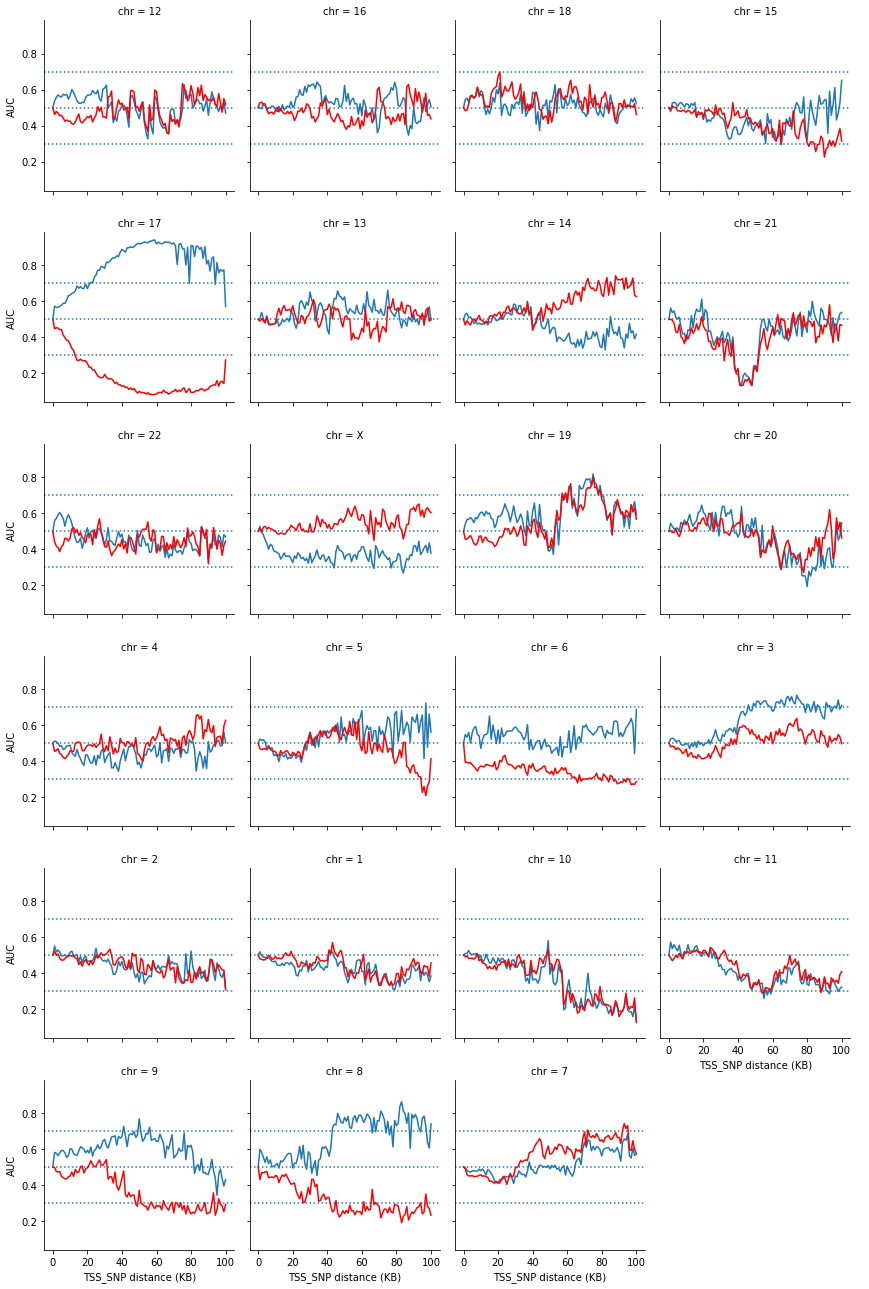

<Figure size 432x288 with 0 Axes>

In [173]:
#%matplotlib notebook
#g = sns.FacetGrid(auc_each_tissue[auc_each_tissue['chr']==6], col='tissue', col_wrap=4)

g = sns.FacetGrid(auc_each_tissue, col='chr', col_wrap=4)
g.map(plt.axhline, y=0.5, ls=":")
g.map(plt.axhline, y=0.7, ls=":")
g.map(plt.axhline, y=0.3, ls=":")
#g.map(sns.lineplot, 'diff', "auc_cn")
#g.map(sns.lineplot, 'diff', "auc_hic", color='red')
g.map(sns.lineplot, 'diff', "cn_auc", ci=None)
g.map(sns.lineplot, 'diff', "hi-c_auc", color='red', ci=None)
for ax in g.axes.flatten():
    ax.set_xlabel('TSS_SNP distance (KB)')
    ax.set_ylabel('AUC')
g.add_legend()
plt.show()
#figname = '/sonas-hs/gillis/hpc/data/lohia/figures/fig_chr6_each_tissue.pdf' 
figname = '/sonas-hs/gillis/hpc/data/lohia/figures/del.pdf' 
#savefig('sample.pdf')
plt.savefig(figname, bbox_inches='tight', dpi=300)

In [524]:
auc_each_tissue['diff'] = auc_each_tissue['diff']/10
auc_each_tissue['diff'] = auc_each_tissue['diff'].astype(int)

In [501]:
auc_each_tissue['diff'] = auc_each_tissue['diff']/2
auc_each_tissue['diff'] = auc_each_tissue['diff'].astype(int)

/home/lohia/anaconda3/envs/py38/lib/python3.8/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


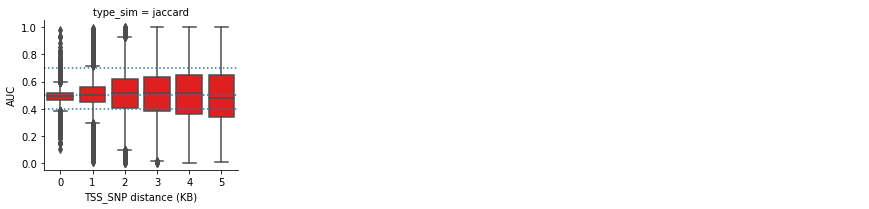

<Figure size 432x288 with 0 Axes>

In [354]:
#%matplotlib notebook
#g = sns.FacetGrid(auc_each_tissue[auc_each_tissue['chr']==6], col='tissue', col_wrap=4)

g = sns.FacetGrid(auc_each_tissue, col='type_sim', col_wrap=4)
g.map(plt.axhline, y=0.5, ls=":")
g.map(plt.axhline, y=0.7, ls=":")
g.map(plt.axhline, y=0.4, ls=":")
#g.map(sns.lineplot, 'diff', "auc_cn")
#g.map(sns.lineplot, 'diff', "auc_hic", color='red')
#g.map(sns.boxplot, 'diff', "cn_auc")
g.map(sns.boxplot, 'diff', "hi-c_auc", color='red')
for ax in g.axes.flatten():
    ax.set_xlabel('TSS_SNP distance (KB)')
    ax.set_ylabel('AUC')
g.add_legend()
plt.show()
#figname = '/sonas-hs/gillis/hpc/data/lohia/figures/fig_chr6_each_tissue.pdf' 
figname = '/sonas-hs/gillis/hpc/data/lohia/figures/del.pdf' 
#savefig('sample.pdf')
plt.savefig(figname, bbox_inches='tight', dpi=300)

In [552]:
auc_each_tissue = auc_each_tissue[auc_each_tissue['enrich']!=-1]

In [428]:
auc_each_tissue[auc_each_tissue['enrich']!=0]

diff    enrich chr       tissue  tissue_size
0       0  1.651667   1  Whole_Blood          670
10      0  1.295044  16  Whole_Blood          670
30      1  0.366306  16  Whole_Blood          670
31      1  0.751516  16  Whole_Blood          670
32      1  0.509322  16  Whole_Blood          670
..    ...       ...  ..          ...          ...
67      3  3.834079   8  Whole_Blood          670
68      3  4.219507   8  Whole_Blood          670
69      3  4.118171   8  Whole_Blood          670
70      3  4.767586   8  Whole_Blood          670
100     5  0.780522   X  Whole_Blood          670

[2056 rows x 5 columns]

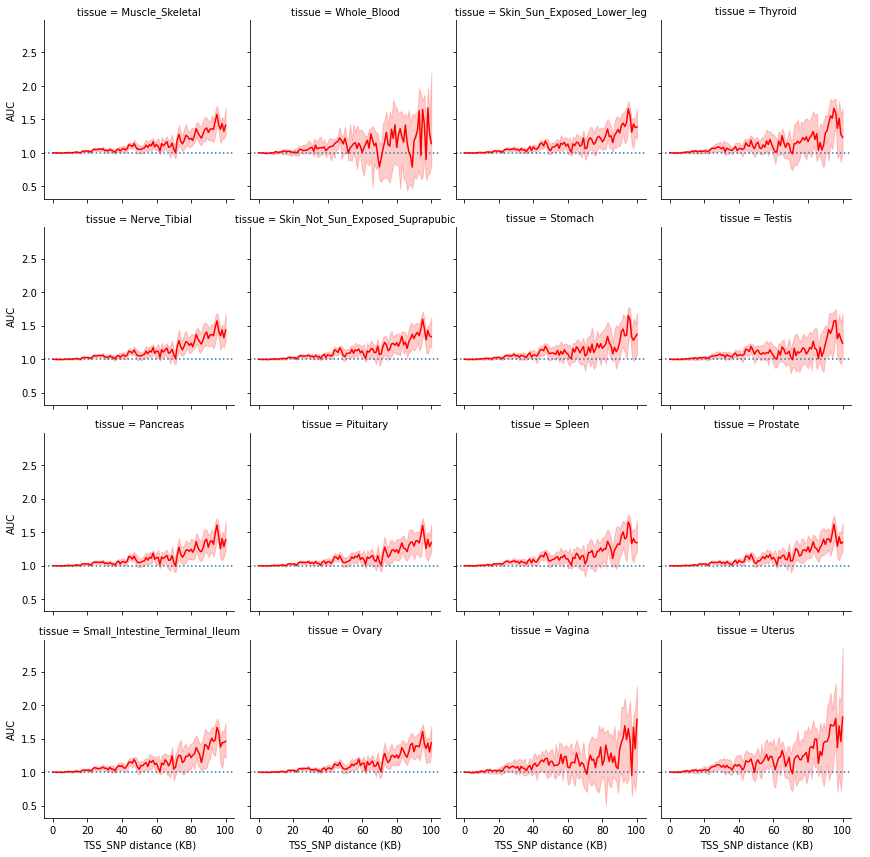

<Figure size 432x288 with 0 Axes>

In [534]:
#%matplotlib notebook
#g = sns.FacetGrid(auc_each_tissue[auc_each_tissue['chr']==6], col='tissue', col_wrap=4)

g = sns.FacetGrid(auc_each_tissue, col='tissue', col_wrap=4)
g.map(plt.axhline, y=1, ls=":")
#g.map(plt.axhline, y=0.7, ls=":")
#g.map(plt.axhline, y=0.4, ls=":")
#g.map(sns.lineplot, 'diff', "auc_cn")
#g.map(sns.lineplot, 'diff', "auc_hic", color='red')
#g.map(sns.boxplot, 'diff', "cn_auc")
g.map(sns.lineplot, 'diff', "enrich", color='red',estimator=np.median,)
for ax in g.axes.flatten():
    ax.set_xlabel('TSS_SNP distance (KB)')
    ax.set_ylabel('AUC')
    
g.add_legend()
plt.show()
#figname = '/sonas-hs/gillis/hpc/data/lohia/figures/fig_chr6_each_tissue.pdf' 
figname = '/sonas-hs/gillis/hpc/data/lohia/figures/del.pdf' 
#savefig('sample.pdf')
plt.savefig(figname, bbox_inches='tight', dpi=300)

/home/lohia/anaconda3/envs/py38/lib/python3.8/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


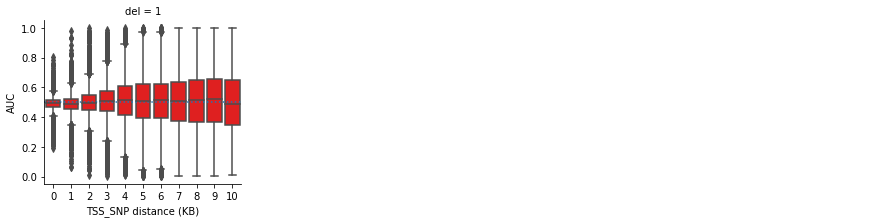

<Figure size 432x288 with 0 Axes>

In [586]:
#%matplotlib notebook
#g = sns.FacetGrid(auc_each_tissue[auc_each_tissue['chr']==6], col='tissue', col_wrap=4)

g = sns.FacetGrid(auc_each_tissue, col='del', col_wrap=4)
#g.map(sns.lineplot, 'diff', "hi-c_auc", color='red',estimator=np.median)
g.map(sns.boxplot, 'diff', "hi-c_auc", color='red')
#g.map(plt.axhline, y=0.36, ls=":")
#g.map(plt.axhline, y=0.7, ls=":")
g.map(plt.axhline, y=0.5, ls=":")
#g.map(sns.lineplot, 'diff', "auc_cn")
#g.map(sns.lineplot, 'diff', "auc_hic", color='red')
#g.map(sns.boxplot, 'diff', "cn_auc")
#g.map(sns.lineplot, 'diff', "enrich", color='red',estimator=np.median)
for ax in g.axes.flatten():
    ax.set_xlabel('TSS_SNP distance (KB)')
    ax.set_ylabel('AUC')
    #ax.set_ylim([0,10])
    
g.add_legend()
plt.show()
#figname = '/sonas-hs/gillis/hpc/data/lohia/figures/fig_chr6_each_tissue.pdf' 
figname = '/sonas-hs/gillis/hpc/data/lohia/figures/del.pdf' 
#savefig('sample.pdf')
plt.savefig(figname, bbox_inches='tight', dpi=300)

In [582]:
auc_each_tissue['del'] = 1

In [554]:
auc_each_tissue['del'] = 1

In [584]:
auc_each_tissue['diff'] = auc_each_tissue['diff']/10
auc_each_tissue['diff'] = auc_each_tissue['diff'].astype(int)

In [ ]:
#%matplotlib notebook
#g = sns.FacetGrid(auc_each_tissue[auc_each_tissue['chr']==6], col='tissue', col_wrap=4)

g = sns.FacetGrid(auc_each_tissue, col='del', col_wrap=4)
g.map(plt.axhline, y=1, ls=":")
#g.map(plt.axhline, y=0.7, ls=":")
#g.map(plt.axhline, y=0.4, ls=":")
#g.map(sns.lineplot, 'diff', "auc_cn")
#g.map(sns.lineplot, 'diff', "auc_hic", color='red')
#g.map(sns.boxplot, 'diff', "cn_auc")
g.map(sns.boxplot, 'diff', "enrich", color='red')
for ax in g.axes.flatten():
    ax.set_xlabel('TSS_SNP distance (KB)')
    ax.set_ylabel('AUC')
    
g.add_legend()
plt.show()
#figname = '/sonas-hs/gillis/hpc/data/lohia/figures/fig_chr6_each_tissue.pdf' 
figname = '/sonas-hs/gillis/hpc/data/lohia/figures/del.pdf' 
#savefig('sample.pdf')
plt.savefig(figname, bbox_inches='tight', dpi=300)

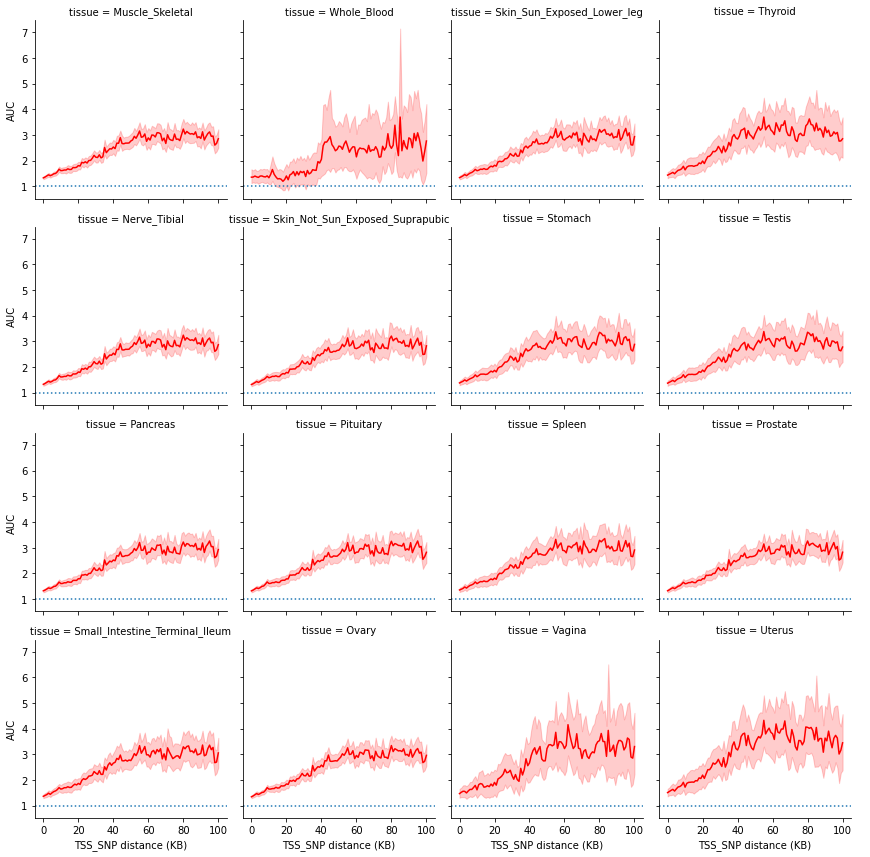

<Figure size 432x288 with 0 Axes>

In [509]:
#%matplotlib notebook
#g = sns.FacetGrid(auc_each_tissue[auc_each_tissue['chr']==6], col='tissue', col_wrap=4)

g = sns.FacetGrid(auc_each_tissue, col='tissue', col_wrap=4)
g.map(plt.axhline, y=1, ls=":")
#g.map(plt.axhline, y=0.7, ls=":")
#g.map(plt.axhline, y=0.4, ls=":")
#g.map(sns.lineplot, 'diff', "auc_cn")
#g.map(sns.lineplot, 'diff', "auc_hic", color='red')
#g.map(sns.boxplot, 'diff', "cn_auc")
g.map(sns.lineplot, 'diff', "enrich", color='red')
for ax in g.axes.flatten():
    ax.set_xlabel('TSS_SNP distance (KB)')
    ax.set_ylabel('AUC')
    
g.add_legend()
plt.show()
#figname = '/sonas-hs/gillis/hpc/data/lohia/figures/fig_chr6_each_tissue.pdf' 
figname = '/sonas-hs/gillis/hpc/data/lohia/figures/del.pdf' 
#savefig('sample.pdf')
plt.savefig(figname, bbox_inches='tight', dpi=300)

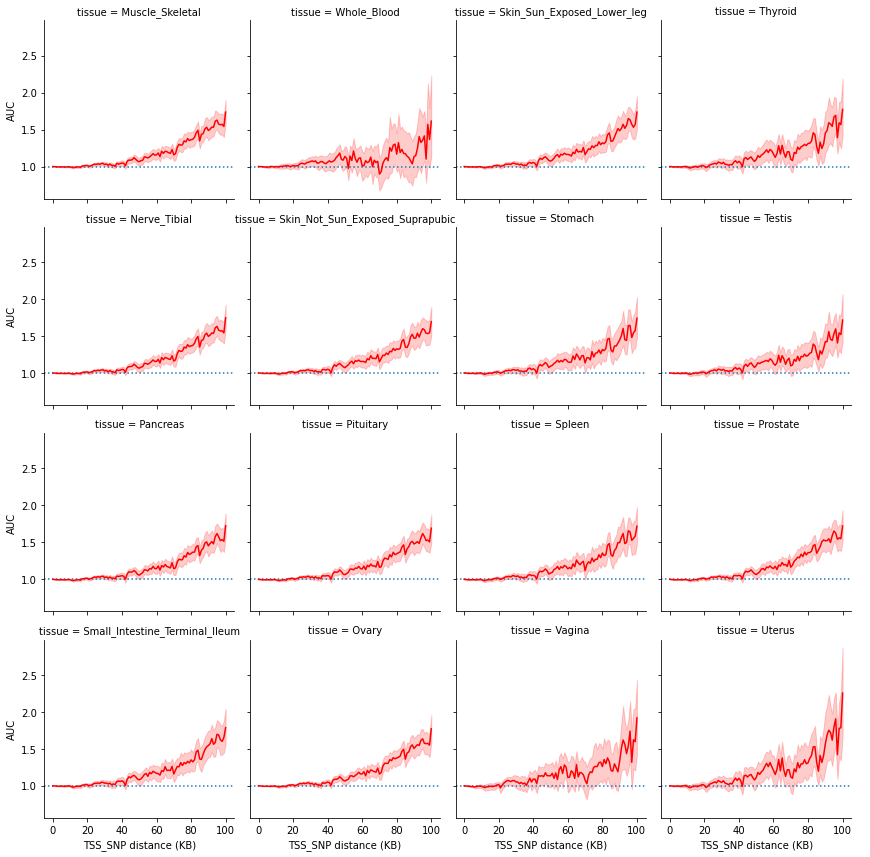

<Figure size 432x288 with 0 Axes>

In [516]:
#%matplotlib notebook
#between TAD
#g = sns.FacetGrid(auc_each_tissue[auc_each_tissue['chr']==6], col='tissue', col_wrap=4)

g = sns.FacetGrid(auc_each_tissue, col='tissue', col_wrap=4)
g.map(plt.axhline, y=1, ls=":")
#g.map(plt.axhline, y=0.7, ls=":")
#g.map(plt.axhline, y=0.4, ls=":")
#g.map(sns.lineplot, 'diff', "auc_cn")
#g.map(sns.lineplot, 'diff', "auc_hic", color='red')
#g.map(sns.boxplot, 'diff', "cn_auc")
g.map(sns.lineplot, 'diff', "enrich", color='red')
for ax in g.axes.flatten():
    ax.set_xlabel('TSS_SNP distance (KB)')
    ax.set_ylabel('AUC')
    
g.add_legend()
plt.show()
#figname = '/sonas-hs/gillis/hpc/data/lohia/figures/fig_chr6_each_tissue.pdf' 
figname = '/sonas-hs/gillis/hpc/data/lohia/figures/del.pdf' 
#savefig('sample.pdf')
plt.savefig(figname, bbox_inches='tight', dpi=300)

/home/lohia/anaconda3/envs/py38/lib/python3.8/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


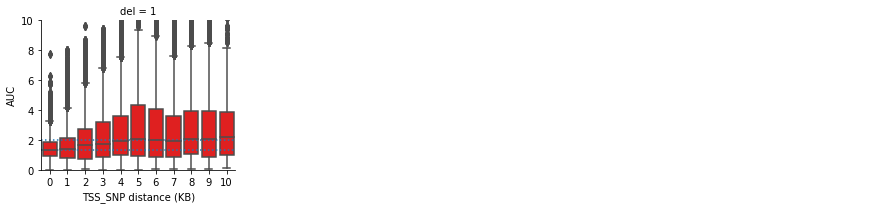

<Figure size 432x288 with 0 Axes>

In [530]:
#%matplotlib notebook
#g = sns.FacetGrid(auc_each_tissue[auc_each_tissue['chr']==6], col='tissue', col_wrap=4)

g = sns.FacetGrid(auc_each_tissue, col='del', col_wrap=4)
g.map(plt.axhline, y=1.3, ls=":")
g.map(plt.axhline, y=2, ls=":")
#g.map(plt.axhline, y=0.4, ls=":")
#g.map(sns.lineplot, 'diff', "auc_cn")
#g.map(sns.lineplot, 'diff', "auc_hic", color='red')
#g.map(sns.boxplot, 'diff', "cn_auc")
g.map(sns.boxplot, 'diff', "enrich", color='red')
for ax in g.axes.flatten():
    ax.set_xlabel('TSS_SNP distance (KB)')
    ax.set_ylabel('AUC')
    ax.set_ylim([0,10])
    
g.add_legend()
plt.show()
#figname = '/sonas-hs/gillis/hpc/data/lohia/figures/fig_chr6_each_tissue.pdf' 
figname = '/sonas-hs/gillis/hpc/data/lohia/figures/del.pdf' 
#savefig('sample.pdf')
plt.savefig(figname, bbox_inches='tight', dpi=300)

In [522]:
auc_each_tissue['del'] = 1

/home/lohia/anaconda3/envs/py38/lib/python3.8/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


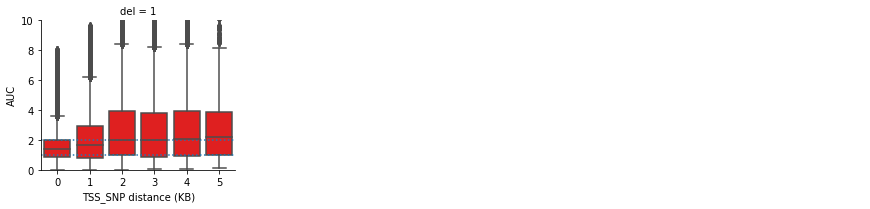

<Figure size 432x288 with 0 Axes>

In [505]:
#%matplotlib notebook
#g = sns.FacetGrid(auc_each_tissue[auc_each_tissue['chr']==6], col='tissue', col_wrap=4)

g = sns.FacetGrid(auc_each_tissue, col='del', col_wrap=4)
g.map(plt.axhline, y=1, ls=":")
g.map(plt.axhline, y=2, ls=":")
#g.map(plt.axhline, y=0.4, ls=":")
#g.map(sns.lineplot, 'diff', "auc_cn")
#g.map(sns.lineplot, 'diff', "auc_hic", color='red')
#g.map(sns.boxplot, 'diff', "cn_auc")
g.map(sns.boxplot, 'diff', "enrich", color='red')
for ax in g.axes.flatten():
    ax.set_xlabel('TSS_SNP distance (KB)')
    ax.set_ylabel('AUC')
    ax.set_ylim([0,10])
    
g.add_legend()
plt.show()
#figname = '/sonas-hs/gillis/hpc/data/lohia/figures/fig_chr6_each_tissue.pdf' 
figname = '/sonas-hs/gillis/hpc/data/lohia/figures/del.pdf' 
#savefig('sample.pdf')
plt.savefig(figname, bbox_inches='tight', dpi=300)

/home/lohia/anaconda3/envs/py38/lib/python3.8/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


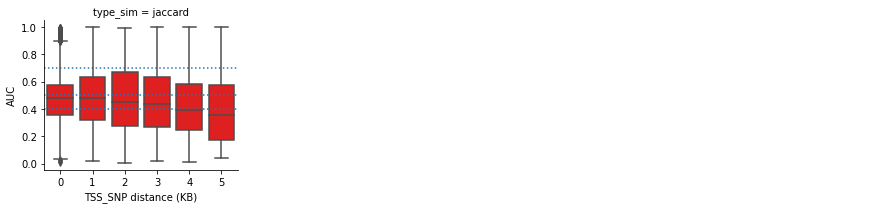

<Figure size 432x288 with 0 Axes>

In [360]:
#%matplotlib notebook
#g = sns.FacetGrid(auc_each_tissue[auc_each_tissue['chr']==6], col='tissue', col_wrap=4)

g = sns.FacetGrid(auc_each_tissue, col='type_sim', col_wrap=4)
g.map(plt.axhline, y=0.5, ls=":")
g.map(plt.axhline, y=0.7, ls=":")
g.map(plt.axhline, y=0.4, ls=":")
#g.map(sns.lineplot, 'diff', "auc_cn")
#g.map(sns.lineplot, 'diff', "auc_hic", color='red')
#g.map(sns.boxplot, 'diff', "cn_auc")
g.map(sns.boxplot, 'diff', "hi-c_auc", color='red')
for ax in g.axes.flatten():
    ax.set_xlabel('TSS_SNP distance (KB)')
    ax.set_ylabel('AUC')
g.add_legend()
plt.show()
#figname = '/sonas-hs/gillis/hpc/data/lohia/figures/fig_chr6_each_tissue.pdf' 
figname = '/sonas-hs/gillis/hpc/data/lohia/figures/del.pdf' 
#savefig('sample.pdf')
plt.savefig(figname, bbox_inches='tight', dpi=300)

/home/lohia/anaconda3/envs/py38/lib/python3.8/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


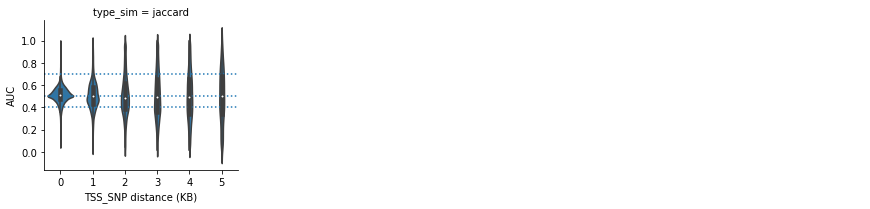

<Figure size 432x288 with 0 Axes>

In [230]:
#%matplotlib notebook
#g = sns.FacetGrid(auc_each_tissue[auc_each_tissue['chr']==6], col='tissue', col_wrap=4)

g = sns.FacetGrid(auc_each_tissue, col='type_sim', col_wrap=4)
g.map(plt.axhline, y=0.5, ls=":")
g.map(plt.axhline, y=0.7, ls=":")
g.map(plt.axhline, y=0.4, ls=":")
#g.map(sns.lineplot, 'diff', "auc_cn")
#g.map(sns.lineplot, 'diff', "auc_hic", color='red')
g.map(sns.violinplot, 'diff', "cn_auc")
#g.map(sns.boxplot, 'diff', "hi-c_auc", color='red')
for ax in g.axes.flatten():
    ax.set_xlabel('TSS_SNP distance (KB)')
    ax.set_ylabel('AUC')
g.add_legend()
plt.show()
#figname = '/sonas-hs/gillis/hpc/data/lohia/figures/fig_chr6_each_tissue.pdf' 
figname = '/sonas-hs/gillis/hpc/data/lohia/figures/del.pdf' 
#savefig('sample.pdf')
plt.savefig(figname, bbox_inches='tight', dpi=300)

/home/lohia/anaconda3/envs/py38/lib/python3.8/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


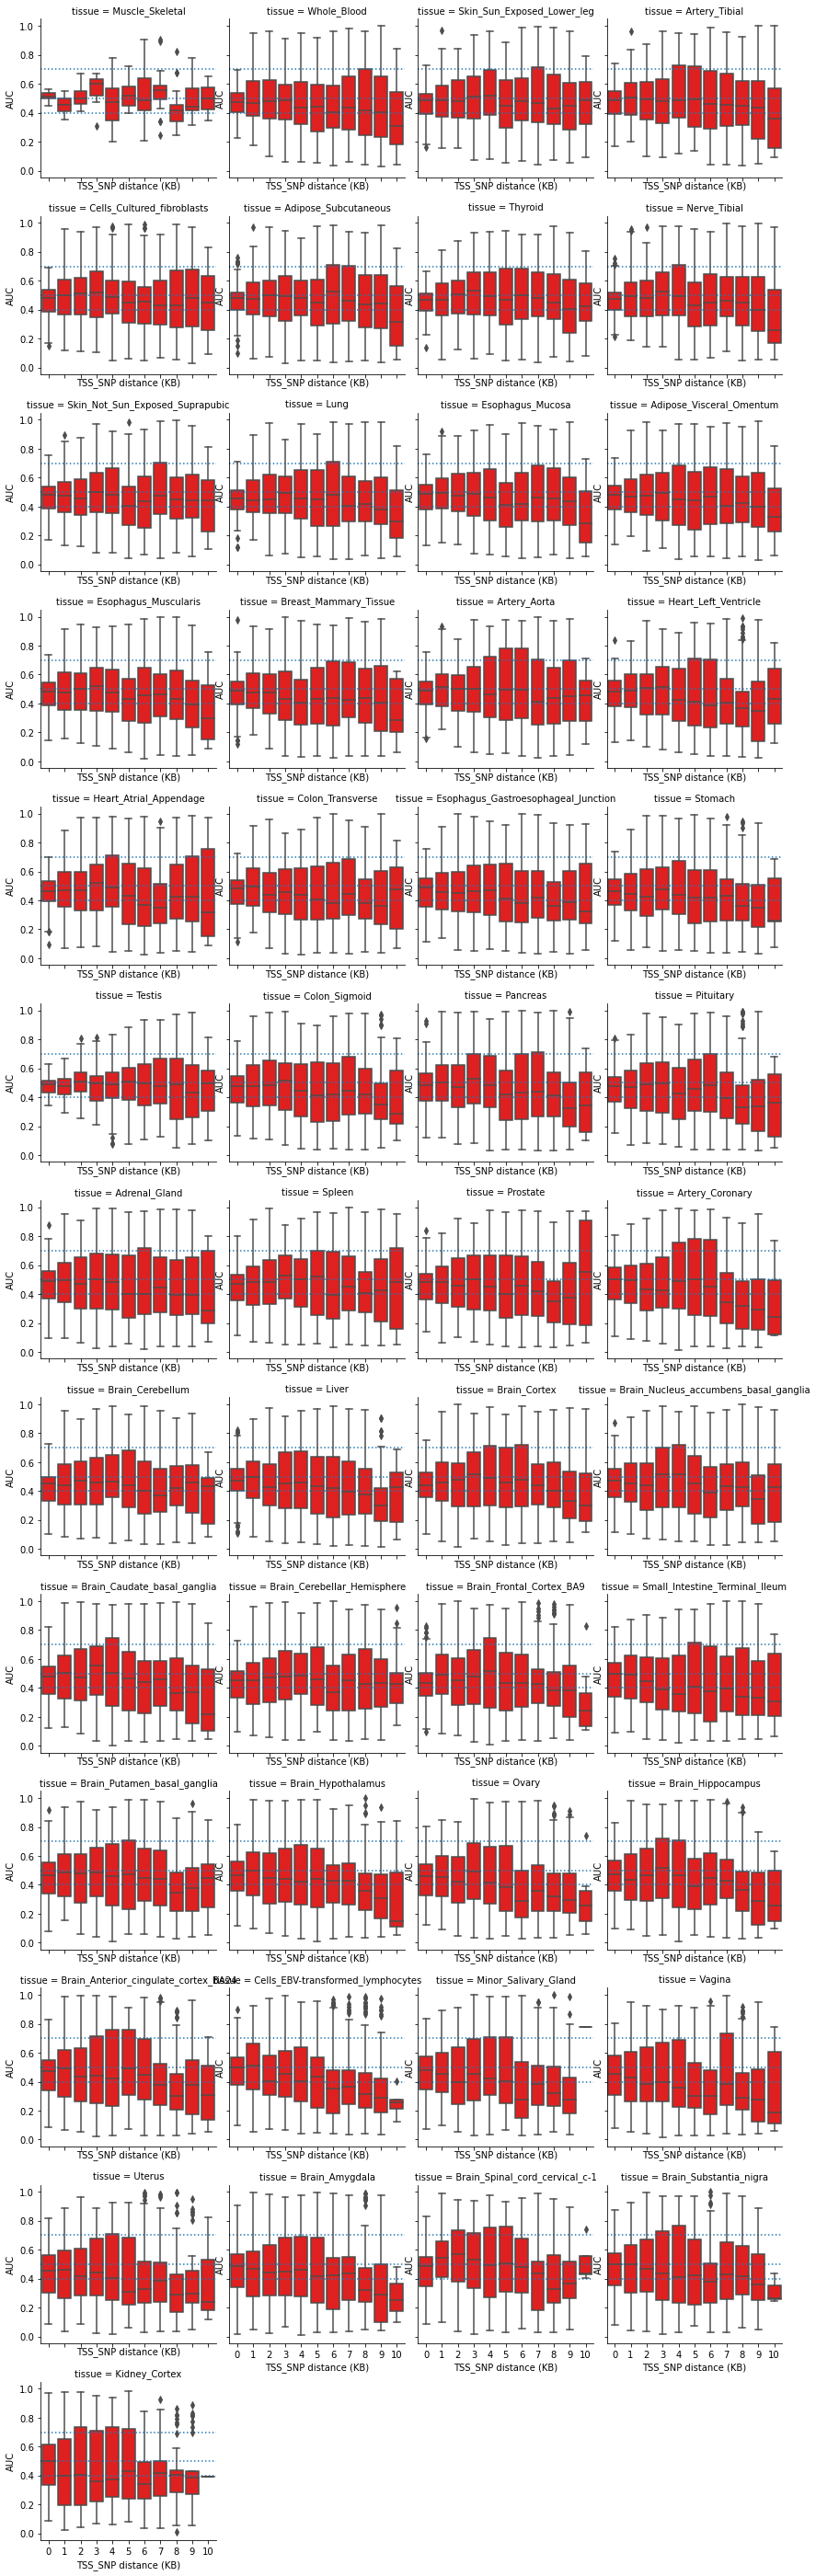

<Figure size 432x288 with 0 Axes>

In [338]:
#%matplotlib notebook
#g = sns.FacetGrid(auc_each_tissue[auc_each_tissue['chr']==6], col='tissue', col_wrap=4)

g = sns.FacetGrid(auc_each_tissue, col='tissue', col_wrap=4)
g.map(plt.axhline, y=0.5, ls=":")
g.map(plt.axhline, y=0.7, ls=":")
g.map(plt.axhline, y=0.4, ls=":")
#g.map(sns.lineplot, 'diff', "auc_cn")
#g.map(sns.lineplot, 'diff', "auc_hic", color='red')
#g.map(sns.violinplot, 'diff', "cn_auc")
g.map(sns.boxplot, 'diff', "hi-c_auc", color='red')
for ax in g.axes.flatten():
    ax.set_xlabel('TSS_SNP distance (KB)')
    ax.set_ylabel('AUC')
g.add_legend()
plt.show()
#figname = '/sonas-hs/gillis/hpc/data/lohia/figures/fig_chr6_each_tissue.pdf' 
figname = '/sonas-hs/gillis/hpc/data/lohia/figures/del.pdf' 
#savefig('sample.pdf')
plt.savefig(figname, bbox_inches='tight', dpi=300)

<AxesSubplot:xlabel='diff', ylabel='hi-c_auc'>

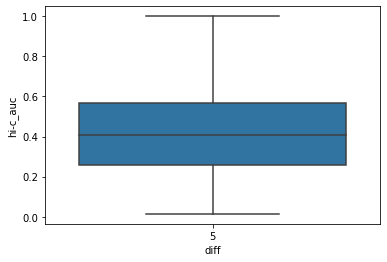

In [229]:
sns.boxplot(data=auc_each_tissue[auc_each_tissue['diff']>4], x='diff', y='hi-c_auc')

<AxesSubplot:xlabel='tissue', ylabel='hi-c_auc'>

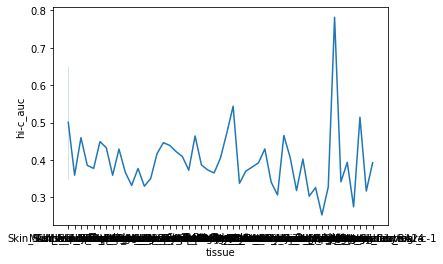

In [342]:
sns.lineplot(data=auc_each_tissue[auc_each_tissue['diff']>9], x='tissue', y='hi-c_auc', sort='False')

In [340]:
        auc_each_tissue.sort_values(by='tissue_size', ascending=False, inplace=True)
        reorder_list = auc_each_tissue.drop_duplicates(['tissue'])['tissue'].to_list()

In [210]:
auc_each_tissue[auc_each_tissue['diff']>4]

hi-c_auc    cn_auc  diff chr           tissue  tp     tn type_sim  \
100  0.561034  0.480652     5   1  Muscle_Skeletal  35  71749  jaccard   
100  0.391769  0.448282     5   2  Muscle_Skeletal  33  48152  jaccard   
100  0.540648  0.245442     5   X  Muscle_Skeletal  44  14575  jaccard   
100  0.539204  0.772248     5   3  Muscle_Skeletal  77  42227  jaccard   
100  0.595671  0.525081     5   4  Muscle_Skeletal   5  29087  jaccard   
..        ...       ...   ...  ..              ...  ..    ...      ...   
100       NaN       NaN     5   5    Kidney_Cortex   0  40504  jaccard   
100       NaN       NaN     5   4    Kidney_Cortex   0  36140  jaccard   
100       NaN       NaN     5   3    Kidney_Cortex   0  48018  jaccard   
100       NaN       NaN     5   2    Kidney_Cortex   0  57179  jaccard   
100       NaN       NaN     5   1    Kidney_Cortex   0  82754  jaccard   

     samples  tissue_size  
100    71784          706  
100    48185          706  
100    14619          706  
100    42304          706  
100    29092          706  
..       ...          ...  
100    40504           73  
100    36140           73  
100    48018           73  
100    57179           73  
100    82754           73  

[1127 rows x 10 columns]

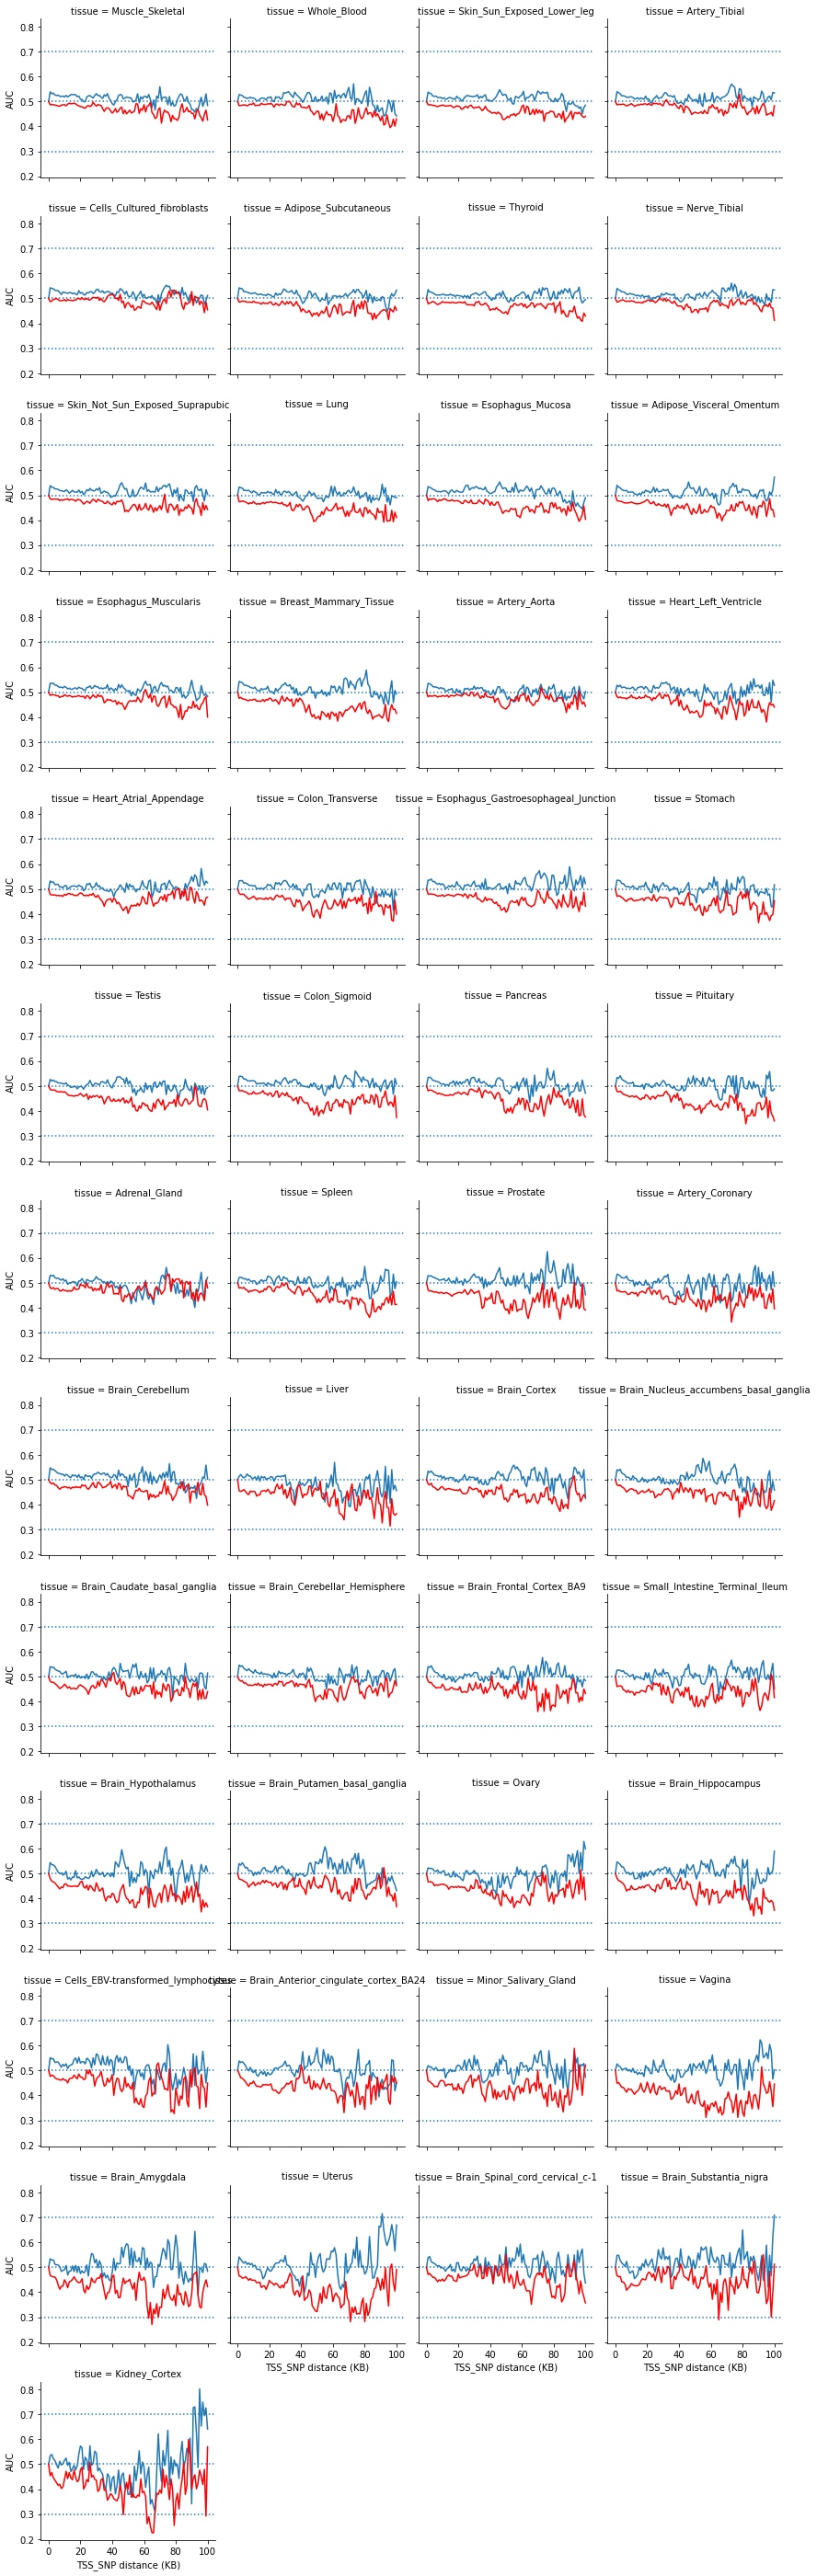

<Figure size 432x288 with 0 Axes>

In [45]:
#%matplotlib notebook
#g = sns.FacetGrid(auc_each_tissue[auc_each_tissue['chr']==6], col='tissue', col_wrap=4)

g = sns.FacetGrid(auc_each_tissue, col='tissue', col_wrap=4)
g.map(plt.axhline, y=0.5, ls=":")
g.map(plt.axhline, y=0.7, ls=":")
g.map(plt.axhline, y=0.3, ls=":")
#g.map(sns.lineplot, 'diff', "auc_cn")
#g.map(sns.lineplot, 'diff', "auc_hic", color='red')
g.map(sns.lineplot, 'diff', "cn_auc", ci=None)
g.map(sns.lineplot, 'diff', "hi-c_auc", color='red', ci=None)
for ax in g.axes.flatten():
    ax.set_xlabel('TSS_SNP distance (KB)')
    ax.set_ylabel('AUC')
g.add_legend()
plt.show()
#figname = '/sonas-hs/gillis/hpc/data/lohia/figures/fig_chr6_each_tissue.pdf' 
figname = '/sonas-hs/gillis/hpc/data/lohia/figures/del.pdf' 
#savefig('sample.pdf')
plt.savefig(figname, bbox_inches='tight', dpi=300)

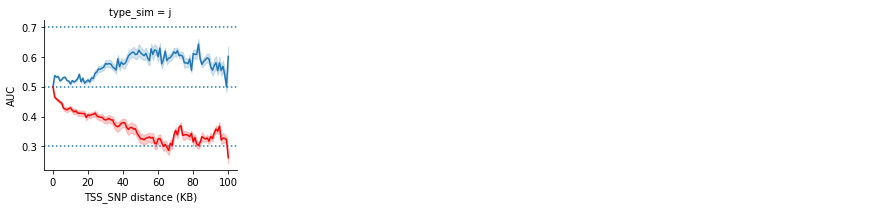

<Figure size 432x288 with 0 Axes>

In [38]:
#%matplotlib notebook
#g = sns.FacetGrid(auc_each_tissue[auc_each_tissue['chr']==6], col='tissue', col_wrap=4)

g = sns.FacetGrid(auc_each_tissue, col='type_sim', col_wrap=4)
g.map(plt.axhline, y=0.5, ls=":")
g.map(plt.axhline, y=0.7, ls=":")
g.map(plt.axhline, y=0.3, ls=":")
g.map(sns.lineplot, 'diff', "auc_cn")
g.map(sns.lineplot, 'diff', "auc_hic", color='red')
#g.map(sns.lineplot, 'diff', "cn_auc", ci=None)
#g.map(sns.lineplot, 'diff', "hi-c_auc", color='red', ci=None)
for ax in g.axes.flatten():
    ax.set_xlabel('TSS_SNP distance (KB)')
    ax.set_ylabel('AUC')
g.add_legend()
plt.show()
#figname = '/sonas-hs/gillis/hpc/data/lohia/figures/fig_chr6_each_tissue.pdf' 
figname = '/sonas-hs/gillis/hpc/data/lohia/figures/del.pdf' 
#savefig('sample.pdf')
plt.savefig(figname, bbox_inches='tight', dpi=300)

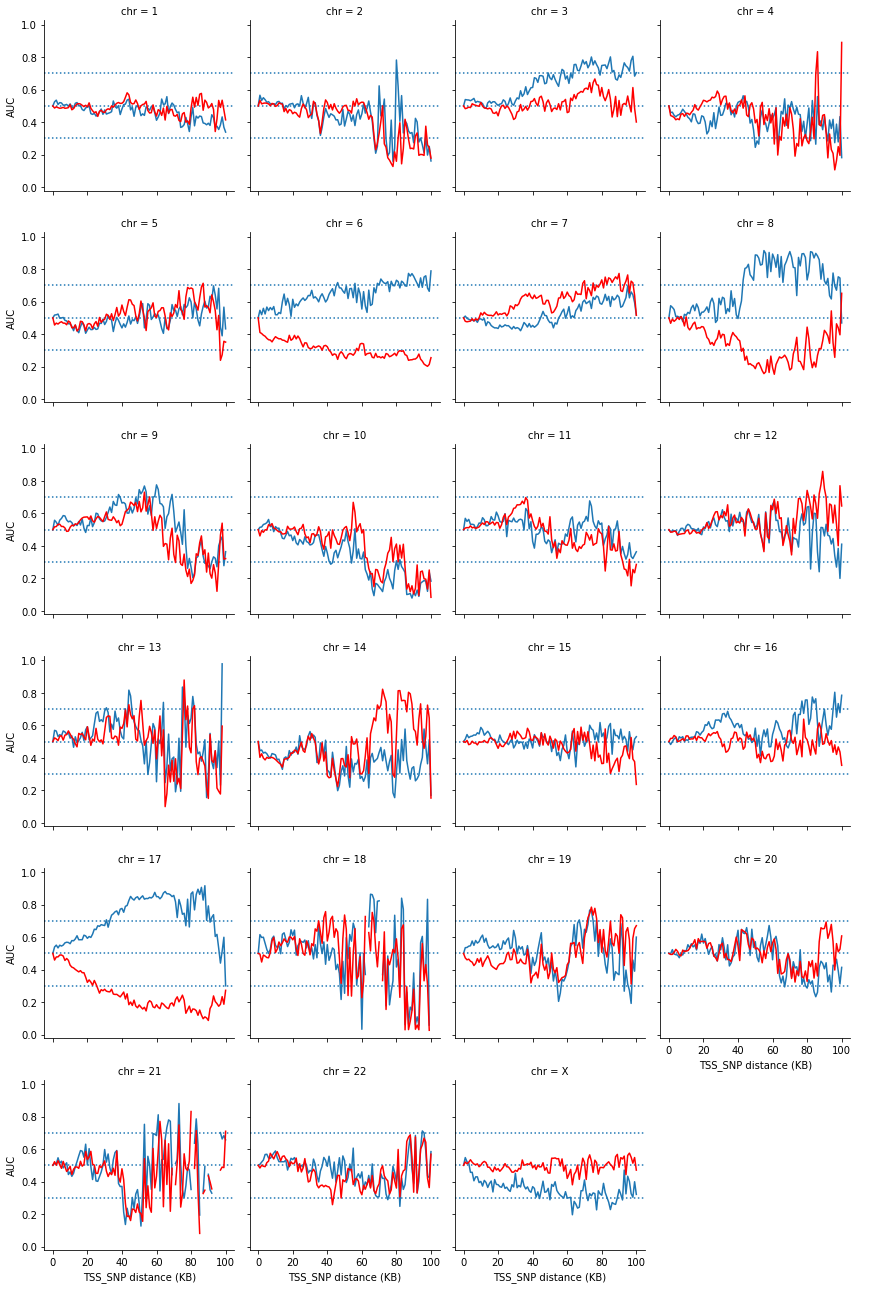

In [108]:
g = sns.FacetGrid(auc_each_tissue[auc_each_tissue['tissue']=='Whole_Blood'], col='chr', col_wrap=4, col_order=list(range(1,23)) + ['X'])
g.map(plt.axhline, y=0.5, ls=":")
g.map(plt.axhline, y=0.7, ls=":")
g.map(plt.axhline, y=0.3, ls=":")
g.map(sns.lineplot, 'diff', "cn_auc")
g.map(sns.lineplot, 'diff', "hi-c_auc", color='red')
for ax in g.axes.flatten():
    ax.set_xlabel('TSS_SNP distance (KB)')
    ax.set_ylabel('AUC')
g.add_legend()
figname = '/sonas-hs/gillis/hpc/data/lohia/figures/fig_all_chr_whole_blood.pdf' 
#savefig('sample.pdf')
plt.savefig(figname, bbox_inches='tight', dpi=300)

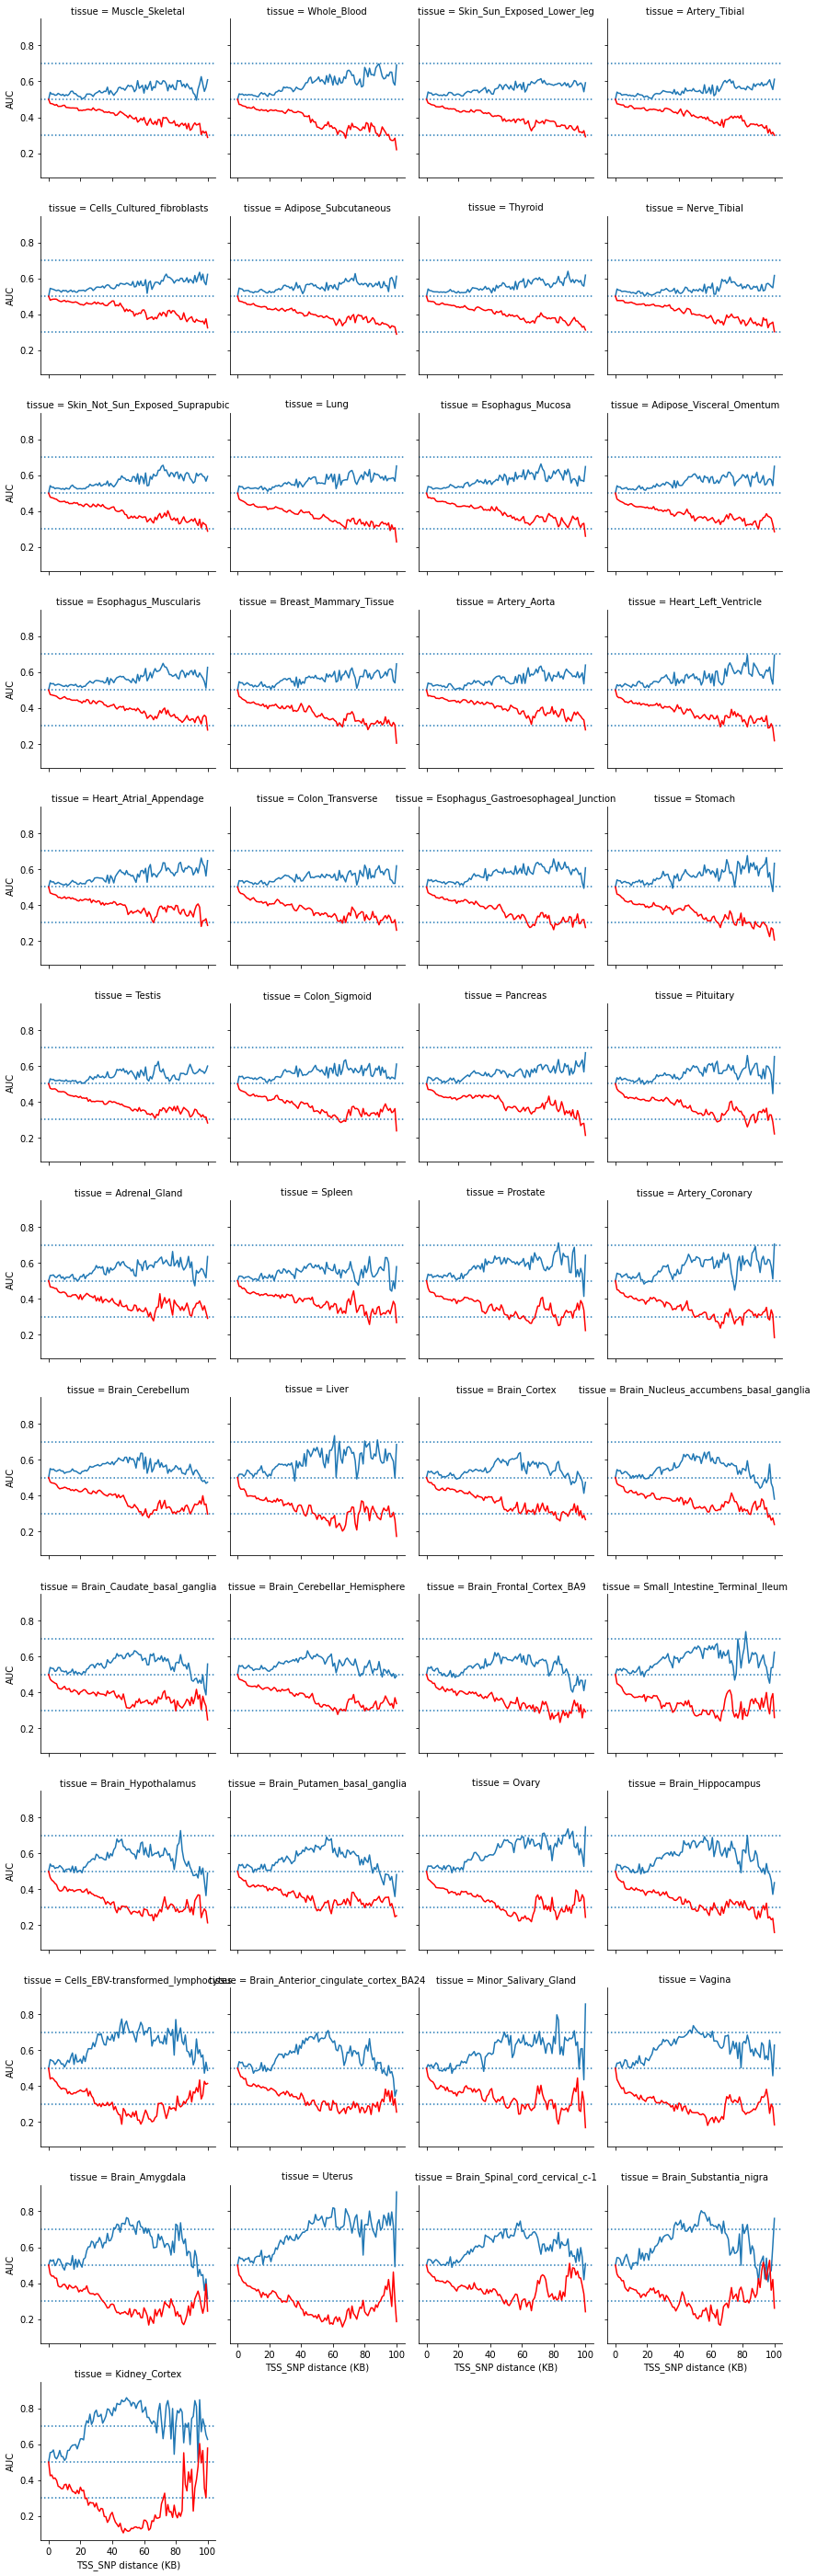

In [130]:
g = sns.FacetGrid(auc_each_tissue, col='tissue', col_wrap=4)
g.map(plt.axhline, y=0.5, ls=":")
g.map(plt.axhline, y=0.7, ls=":")
g.map(plt.axhline, y=0.3, ls=":")
g.map(sns.lineplot, 'diff', "auc_cn")
g.map(sns.lineplot, 'diff', "auc_hic", color='red')
for ax in g.axes.flatten():
    ax.set_xlabel('TSS_SNP distance (KB)')
    ax.set_ylabel('AUC')
g.add_legend()
figname = '/sonas-hs/gillis/hpc/data/lohia/figures/fig_all_chr_each_tissue.pdf' 
#savefig('sample.pdf')
plt.savefig(figname, bbox_inches='tight', dpi=300)

In [129]:
auc_each_tissue

auc_hic    auc_cn    tp       tn  diff           tissue  samples  \
50  0.397228  0.578696  7884  1547662    50  Muscle_Skeletal  1555546   
63  0.376060  0.575834  5510  1551763    63  Muscle_Skeletal  1557273   
73  0.395464  0.600700  4423  1551611    73  Muscle_Skeletal  1556034   
72  0.398774  0.603868  4342  1558761    72  Muscle_Skeletal  1563103   
71  0.346894  0.585170  4483  1559319    71  Muscle_Skeletal  1563802   
..       ...       ...   ...      ...   ...              ...      ...   
72  0.293971  0.630190   105  1841845    72    Kidney_Cortex  1841950   
73  0.326437  0.707047    80  1833383    73    Kidney_Cortex  1833463   
74  0.200954  0.814494    79  1833196    74    Kidney_Cortex  1833275   
75  0.263152  0.842647    96  1837267    75    Kidney_Cortex  1837363   
0   0.500000  0.500000  6927   871602     0    Kidney_Cortex   878529   

    tissue_size  
50          706  
63          706  
73          706  
72          706  
71          706  
..          ...  
72           73  
73           73  
74           73  
75           73  
0            73  

[4949 rows x 8 columns]

In [ ]:
base_folder = '/sonas-hs/gillis/hpc/data/lohia/'
chrom = 6
study_id = 'SRA_study_not_ranked_all.sh'
tads = pd.read_csv(f'{base_folder}/OnTAD-master/%s_chr%s.tad' %(study_id, chrom), sep ='\t', names = ['startpos' , 'endpos' , 'TADlevel',  'TADmean',  'TADscore'])

In [ ]:
tads[tads['TADlevel']==1]

In [ ]:
NET=$( awk -v var="$SGE_TASK_ID" 'NR==var' /sonas-hs/gillis/hpc/data/lohia/eQTL/GTEx_Analysis_v8_eQTL/tissue.txt)
NET_null=$( awk -v var="$SGE_TASK_ID" 'NR==var' /sonas-hs/gillis/hpc/data/lohia/eQTL/GTEx_Analysis_v8_eQTL_all_associations/tissue.txt )

In [86]:
    #!/grid/gillis/home/nfox/software/miniconda3/bin/python
    #!/sonas-hs/gillis/hpc/home/nfox/software/miniconda3/bin/python
    import pandas as pd
    import argparse
    import os
    import shutil
    import numpy as np
    import pandas as pd
    import h5py
    import scipy.stats as stats
    import sys
    from lohia_utilities.calculate_auc import calc_auroc



    tissue_list_sig = ['Skin_Not_Sun_Exposed_Suprapubic.v8.signif_variant_gene_pairs.txt.gz']
    tissue_null_list = ['Skin_Sun_Exposed_Lower_leg.allpairs.txt.gz']
    simlarity_type = 'jaccard'
    base_folder = '/sonas-hs/gillis/hpc/data/lohia/'
    networks_list = ["SRA_study_agg.sh"]
    fraction_list = []
    fraction_random_list = []
    fraction_diff_list = []
    null_list = []
    df_list = []
    study = []
    all_chr_tis_auc = []

    #tissue_list_sig = open(f"{base_folder}/eQTL/GTEx_Analysis_v8_eQTL/tissue.txt", "r")
    #tissue_null_list = open(f"{base_folder}/eQTL/GTEx_Analysis_v8_eQTL_all_associations/tissue.txt", "r")
    for networks_s in networks_list:
        for tissue, tissue_null in zip(tissue_list_sig, tissue_null_list):
            df_combine_list = []
            #chr_list = list(range(1,23)) + ['X']
            #chr_list = list(range(17)) + ['X']
            chr_list = list(range(5,6))
            #chr_list = list(range(15,16)) 
            #chr_list = list(range(1,7)) + ['X']
            
            sig_pairs = pd.read_csv(f"{base_folder}/eQTL/GTEx_Analysis_v8_eQTL/{tissue}", sep='\t')
            sig_pairs['gene_id'] = sig_pairs['gene_id'].str.split('.', expand=True)[0]
            sig_pairs['variant_id_gene_id'] = sig_pairs['variant_id'] + sig_pairs['gene_id']
            set_sig = set(sig_pairs['variant_id_gene_id'].tolist()) 
            for chrom in chr_list:
                print (chrom)
                #sig_pairs = pd.read_hdf(f"/sonas-hs/gillis/hpc/data/lohia/eQTL/GTEx_hic/chr{chrom}_tss_tss_10_VC_rank_entire_genes_{networks_s.split()[0]}_{tissue.split()[0]}_cn_90.hdf")
                #sig_pairs = pd.read_hdf(f"/sonas-hs/gillis/hpc/data/lohia/eQTL/GTEx_Analysis_v8_eQTL/{tissue.split()[0]}.hdf")
                #sig_pairs['sample'] = 'sig'
                #null_var_1 = pd.read_hdf(f"/sonas-hs/gillis/hpc/data/lohia/eQTL/GTEx_hic/chr{chrom}_tss_tss_10_VC_rank_entire_genes_{networks_s.split()[0]}_null_90.hdf")
                try:
                    all_pairs = pd.read_hdf(f"/{base_folder}/eQTL/all_pairs_3/chr{chrom}_tss_tss_10_VC_rank_entire_genes_{networks_s}_{tissue_null}_cn_90_subset_{simlarity_type}.hdf")
                except FileNotFoundError:
                    continue
                all_pairs['sample'] = 'null'
                all_pairs['gene_id'] = all_pairs['gene_id'].str.split('.', expand=True)[0]
                all_pairs['variant_id_gene_id'] = all_pairs['variant_id'] + all_pairs['gene_id']
                all_pairs['truth'] = [1 if x in set_sig else 0 for x in all_pairs['variant_id_gene_id']]
                #all_pairs = all_pairs[all_pairs['diff'] > 0]
                #sig_all = pd.concat([sig_pairs, all_pairs])
                #sig_all = sig_all.drop_duplicates(subset=['variant_id', 'gene_id'])
                #sig_all['diff'] = [0 if x <= 10 else 250 if x<=25 else 500 if x<=50 else 1000 for x in sig_all['diff'] ]
                df_combine_list.append(all_pairs[['chr', 'diff', 'hi-c', 'c_n', 'truth']])
                
                lt
                


        




5


NameError: name 'lt' is not defined

In [66]:
true_pairs.columns

Index(['gene_id', 'variant_id', 'tss_distance', 'ma_samples', 'ma_count',
       'maf', 'pval_nominal', 'slope', 'slope_se', 'chr', 'tss_var', 'tss',
       'tss_random', 'tss_bin', 'tss_random_bin', 'tss_var_bin', 'diff',
       'hi-c-random', 'hi-c', 'thresh', 'thresh_50', 'c_n', 'c_n_random',
       'sample', 'variant_id_gene_id', 'truth'],
      dtype='object')

In [80]:
true_pairs['diff'].max()

100

In [87]:
true_pairs = all_pairs[all_pairs['truth']==1]

In [61]:
true_pairs['tss_var_bin']

53762358       21
53762536       24
53762731       28
53762767       29
53762770       29
            ...  
66499407    17060
66499408    17060
66499411    17060
66499415    17061
66499419    17061
Name: tss_var_bin, Length: 383824, dtype: int64

In [77]:
true_pairs[['variant_id', 'tss_var_bin']].groupby(['tss_var_bin']).count().reset_index()

tss_var_bin  variant_id
0              12           1
1              13           8
2              14          15
3              15          12
4              16           4
...           ...         ...
4831         8316          14
4832         8317          24
4833         8318          26
4834         8319          16
4835         8320          10

[4836 rows x 2 columns]

<AxesSubplot:ylabel='Count'>

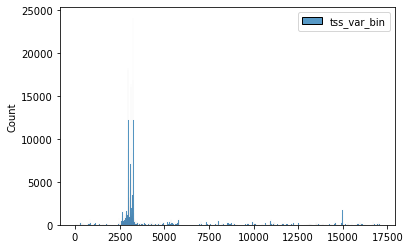

In [73]:
sns.histplot(true_pairs[['tss_var_bin']])

<AxesSubplot:ylabel='Count'>

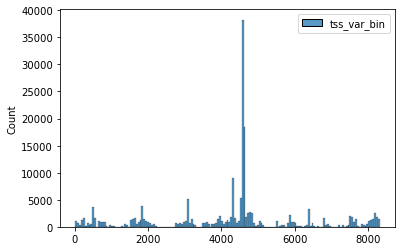

In [78]:
sns.histplot(true_pairs[['tss_var_bin']])

<AxesSubplot:ylabel='Count'>

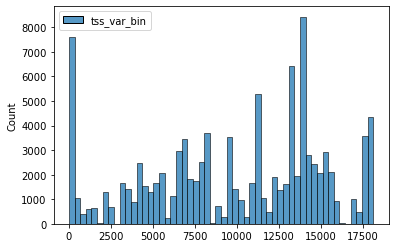

In [88]:
sns.histplot(true_pairs[['tss_var_bin']])

<AxesSubplot:ylabel='Count'>

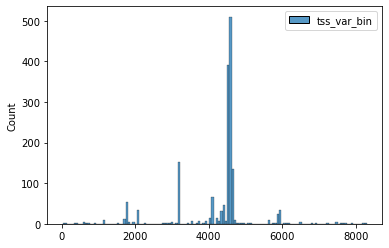

In [85]:
sns.histplot(true_pairs[true_pairs['diff']>90][['tss_var_bin']])

<AxesSubplot:xlabel='tss_var_bin', ylabel='diff'>

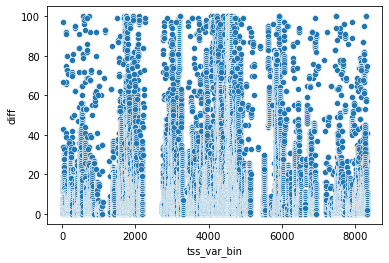

In [81]:
sns.scatterplot(data=true_pairs, x='tss_var_bin', y='diff')

<AxesSubplot:xlabel='tss_var_bin', ylabel='hi-c'>

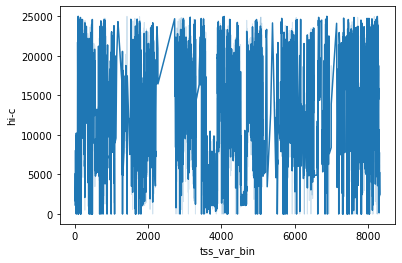

In [83]:
sns.lineplot(data=true_pairs, x='tss_var_bin', y='hi-c')

In [ ]:
                
                for given_chr in  [all_pairs]:
                  auc_list_tss = []
                  auc_list_cn = []
                  diff_list = []
                  chr_given = []
                  tissue_given = []
                  no_of_tp = []
                  total_sample = []


                  grouped_gene_id = given_chr.groupby(['diff'])
                  for gene_id in grouped_gene_id.groups.keys():
                      df_gene = grouped_gene_id.get_group(gene_id)
                      diff_list.append(gene_id)
                      #print (df_gene)
                      #df_gene.dropna(subset=['exp'], inplace=True) 
                      #print (df_gene.shape)

                      #pval_upper = df_gene['pval_nominal'].min()
                      #print (exp_upper)
                      #exp_lower = np.percentile(df_2_or[['exp']], 50)

                      df = pd.DataFrame(columns = ['predicted_score', 'true_pos', 'true_neg'])   

                      #paired_df['exp_label'] = [1.0 if x > exp_upper else 0.0 if x < exp_lower else np.nan for x in paired_df['exp']]

                      df['predicted_score'] = df_gene['hi-c'].tolist()
                      #df['predicted_score'] = df_gene['tss_distance'].tolist()
                      #df['predicted_score'] = 1/df['predicted_score']
                      #df['predicted_score'] = df['predicted_score'].abs()
                      #df['true_pos'] = [1 if ((x== pval_upper) and (y==1)) else 0 for x,y in zip(df_gene['pval_nominal'], df_gene['truth'])]
                      df['true_pos'] = df_gene['truth'].tolist()
                      #print (len(df['true_pos'].to_list()))
                      df['true_neg'] = [0 if x==1 else 1 for x in df['true_pos']]
                      #print (calc_auroc(df,predicted_score='predicted_score'))
                      calculated_auc = calc_auroc(df,predicted_score='predicted_score')
                      auc_list_tss.append(calculated_auc)
                      df['predicted_score'] = df_gene['c_n'].tolist()
                      calculated_auc = calc_auroc(df,predicted_score='predicted_score')
                      auc_list_cn.append(calculated_auc)
                      chr_given.append(chrom)
                      tissue_given.append(tissue_null.split()[0])
                      no_of_tp.append(df_gene['truth'].sum())
                      total_sample.append(df_gene['truth'].shape[0])
                df_auc = pd.DataFrame(list(zip(auc_list_tss, auc_list_cn, diff_list, chr_given, tissue_given, no_of_tp, total_sample)),
                columns =['hi-c_auc', 'cn_auc', 'diff', 'chr', 'tissue', 'tp', 'tn'])
                df_auc['type_sim'] = simlarity_type
                all_chr_tis_auc.append(df_auc)
                df = pd.concat(all_chr_tis_auc)
                df.to_hdf(f'{base_folder}/eQTL/all_pairs_3/{tissue}_90_chr_auc_{simlarity_type}.hdf', index=False, key='df', mode='w')
            df2 = pd.concat(df_combine_list)
            
            #df2 = df2[df2['diff'] > 0]
            file1 = open(f"{base_folder}/eQTL/all_pairs_3/{tissue}_90_auc_allchr{simlarity_type}.txt", "w")


            
            grouped_gene_id = df2.groupby(['diff'])
            
            for gene_id in grouped_gene_id.groups.keys():
                df_gene = grouped_gene_id.get_group(gene_id)

                #print (df_gene)
                #df_gene.dropna(subset=['exp'], inplace=True) 
                #print (df_gene.shape)
                
                #pval_upper = df_gene['pval_nominal'].min()
                #print (exp_upper)
                #exp_lower = np.percentile(df_2_or[['exp']], 50)
                
                df = pd.DataFrame(columns = ['predicted_score', 'true_pos', 'true_neg'])   

                #paired_df['exp_label'] = [1.0 if x > exp_upper else 0.0 if x < exp_lower else np.nan for x in paired_df['exp']]
                    
                df['predicted_score'] = df_gene['hi-c'].tolist()
                #df['predicted_score'] = df_gene['tss_distance'].tolist()
                #df['predicted_score'] = 1/df['predicted_score']
                #df['predicted_score'] = df['predicted_score'].abs()
                #df['true_pos'] = [1 if ((x== pval_upper) and (y==1)) else 0 for x,y in zip(df_gene['pval_nominal'], df_gene['truth'])]
                df['true_pos'] = df_gene['truth'].tolist()
                #print (len(df['true_pos'].to_list()))
                df['true_neg'] = [0 if x==1 else 1 for x in df['true_pos']]
                #print (calc_auroc(df,predicted_score='predicted_score'))
                calculated_auc = calc_auroc(df,predicted_score='predicted_score')

                file1.write("%s\t" %calculated_auc)
                df['predicted_score'] = df_gene['c_n'].tolist()
                calculated_auc = calc_auroc(df,predicted_score='predicted_score')

                file1.write("%s\t" %calculated_auc)
                file1.write("%s\t" %(df_gene['truth'].sum()))
                file1.write("%s\t" %(df_gene['truth'].shape[0]))
                file1.write("%s\n" %gene_id)
            file1.close()
            #df2.to_hdf(f'{base_folder}/eQTL/all_pairs/{tissue}_90.hdf', index=False, key='df', mode='w')

In [ ]:
#!/grid/gillis/home/nfox/software/miniconda3/bin/python
#!/sonas-hs/gillis/hpc/home/nfox/software/miniconda3/bin/python

import sys
import bottleneck
import scipy.stats as stats
import numpy as np
import pandas as pd
from calculate_auc import calc_auroc
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier


import pandas as pd
import seaborn as sns
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt

from calculate_auc import calc_auroc
base_folder = '/sonas-hs/gillis/hpc/data/lohia/'
networks_list = open(f"{base_folder}/hi_c_data_processing/software/SRA_network/SRA_study_agg.sh", "r")
fraction_list = []
fraction_random_list = []
fraction_diff_list = []
null_list = []
df_list = []
study = []

all_chr_tis_auc = []
tissue_list_sig = open(f"{base_folder}/eQTL/GTEx_Analysis_v8_eQTL/tissue.txt", "r")
tissue_null_list_ = open(f"{base_folder}/eQTL/GTEx_Analysis_v8_eQTL_all_associations/tissue.txt", "r")
tissue_null_list = []
for i in tissue_null_list_:
    tissue_null_list.append(i.split()[0])
tissue_null_list.reverse()
for networks_s in networks_list:
    for tissue_null in tissue_null_list:
        chr_list = list(range(1,23)) + ['X']
        df_combine_list = []
        #chr_list = list(range(17,18))
        #chr_list = ['6']
        

        for chrom in chr_list:
            print (chrom)
            #sig_pairs = pd.read_hdf(f"/sonas-hs/gillis/hpc/data/lohia/eQTL/GTEx_hic/chr{chrom}_tss_tss_10_VC_rank_entire_genes_{networks_s.split()[0]}_{tissue.split()[0]}_cn_90.hdf")
            #sig_pairs = pd.read_hdf(f"/sonas-hs/gillis/hpc/data/lohia/eQTL/GTEx_Analysis_v8_eQTL/{tissue.split()[0]}.hdf")
            #sig_pairs['sample'] = 'sig'
            #null_var_1 = pd.read_hdf(f"/sonas-hs/gillis/hpc/data/lohia/eQTL/GTEx_hic/chr{chrom}_tss_tss_10_VC_rank_entire_genes_{networks_s.split()[0]}_null_90.hdf")
            all_pairs = pd.read_hdf(f"{base_folder}/eQTL/all_pairs_3/chr{chrom}_tss_tss_10_VC_rank_entire_genes_SRA_study_not_ranked_all.sh_{tissue_null}_tads.hdf")
            all_pairs['tissue'] = tissue_null.split('.')[0]
            all_pairs['tissue_size'] = tissue_size[tissue_null.split('.')[0]]
            all_pairs['tad_h_coarse'] = [1 if x >= 1 else 0 for x in all_pairs['tad_h'] ] 
            all_pairs = all_pairs[all_pairs['tad_y'] > 0]
            all_pairs.sort_values(by='tissue_size', ascending=False, inplace=True)
            
            #all_pairs = all_pairs[all_pairs['diff'] > 10]
            #sig_all = pd.concat([sig_pairs, all_pairs])
            #sig_all = sig_all.drop_duplicates(subset=['variant_id', 'gene_id'])
            #sig_all['diff'] = [0 if x <= 10 else 250 if x<=25 else 500 if x<=50 else 1000 for x in sig_all['diff'] ]
            df_combine_list.append(all_pairs)
        df = pd.concat(df_combine_list)
        df.sort_values(by='tissue_size', ascending=False, inplace=True)
        reorder_list = df.drop_duplicates(['tissue'])['tissue'].to_list()
        d2 = df.groupby(['truth', 'diff', 'tissue'])['tad_h_coarse'].value_counts(normalize=True).rename('Fraction in same TAD').reset_index()
        
        

        g = sns.FacetGrid(d2[d2['tad_h_coarse']==1], col='tissue', col_wrap=4, hue='truth',  col_order=reorder_list)
        #g.map(plt.axhline, y=200, ls=":")
        #g.map(plt.axhline, y=0.7, ls=":")
        #g.map(plt.axhline, y=0.3, ls=":")
        g.map(sns.lineplot, 'diff', "Fraction in same TAD")
        #g.add_legend()
        for ax in g.axes.flatten():
            ax.set_xlabel('TSS_SNP distance (KB)')

        figname = ('/grid/gillis/data/lohia/figures/TAD_%s_%s.pdf' %(len(chr_list), tissue_null))
        #figname = ('/grid/gillis/data/lohia/figures/TAD.pdf')
        #savefig('sample.pdf')
        plt.savefig(figname, bbox_inches='tight', dpi=300)




1


NameError: name 'lt' is not defined

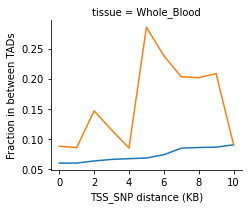

In [140]:
import sys
import bottleneck
import scipy.stats as stats
import numpy as np
import pandas as pd
from lohia_utilities.calculate_auc import calc_auroc
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier



import pandas as pd
import seaborn as sns
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt


base_folder = '/sonas-hs/gillis/hpc/data/lohia/'
networks_list = open(f"{base_folder}/hi_c_data_processing/software/SRA_network/SRA_study_agg.sh", "r")
fraction_list = []
fraction_random_list = []
fraction_diff_list = []
null_list = []
df_list = []
study = []

all_chr_tis_auc = []
tissue_list_sig = open(f"{base_folder}/eQTL/GTEx_Analysis_v8_eQTL/tissue.txt", "r")
tissue_null_list_ = open(f"{base_folder}/eQTL/GTEx_Analysis_v8_eQTL_all_associations/tissue.txt", "r")
tissue_null_list = []
for i in tissue_null_list_:
    tissue_null_list.append(i.split()[0])
tissue_null_list.reverse()
for networks_s in networks_list:
    for tissue_null in tissue_null_list:
        df_combine_list = []
        choice_list = [list(range(1,23)) + ['X'], ['6'] ]
        #chr_list = choice_list[sys.argv[3]]
        chr_list = list(range(1,23)) + ['X']
        #chr_list = ['6']
        

        for chrom in chr_list:
            print (chrom)
            #sig_pairs = pd.read_hdf(f"/sonas-hs/gillis/hpc/data/lohia/eQTL/GTEx_hic/chr{chrom}_tss_tss_10_VC_rank_entire_genes_{networks_s.split()[0]}_{tissue.split()[0]}_cn_90.hdf")
            #sig_pairs = pd.read_hdf(f"/sonas-hs/gillis/hpc/data/lohia/eQTL/GTEx_Analysis_v8_eQTL/{tissue.split()[0]}.hdf")
            #sig_pairs['sample'] = 'sig'
            #null_var_1 = pd.read_hdf(f"/sonas-hs/gillis/hpc/data/lohia/eQTL/GTEx_hic/chr{chrom}_tss_tss_10_VC_rank_entire_genes_{networks_s.split()[0]}_null_90.hdf")
            all_pairs = pd.read_hdf(f"{base_folder}/eQTL/all_pairs_3/chr{chrom}_tss_tss_10_VC_rank_entire_genes_SRA_study_not_ranked_all.sh_{tissue_null}_tads.hdf")
            all_pairs['tissue'] = tissue_null.split('.')[0]
            all_pairs['tissue_size'] = tissue_size[tissue_null.split('.')[0]]
            all_pairs['tad_h_coarse'] = [1 if x >= 1 else 0 for x in all_pairs['tad_y'] ] 
            #all_pairs = all_pairs[all_pairs['tad_y'] > 0]
            
            #all_pairs = all_pairs[all_pairs['diff'] > 10]
            #sig_all = pd.concat([sig_pairs, all_pairs])
            #sig_all = sig_all.drop_duplicates(subset=['variant_id', 'gene_id'])
            #sig_all['diff'] = [0 if x <= 10 else 250 if x<=25 else 500 if x<=50 else 1000 for x in sig_all['diff'] ]
            df_combine_list.append(all_pairs)
            df = pd.concat(df_combine_list)
            df.sort_values(by='tissue_size', ascending=False, inplace=True)
            df['diff'] = df['diff'] / 10
            df['diff'] = df['diff'].astype('int')
            
            reorder_list = df.drop_duplicates(['tissue'])['tissue'].to_list()
            d2 = df.groupby(['truth', 'diff', 'tissue'])['tad_h_coarse'].value_counts(normalize=True).rename('Fraction in between TADs').reset_index()



            g = sns.FacetGrid(d2[d2['tad_h_coarse']==0], col='tissue', col_wrap=4, hue='truth',  col_order=reorder_list)
            #g.map(plt.axhline, y=200, ls=":")
            #g.map(plt.axhline, y=0.7, ls=":")
            #g.map(plt.axhline, y=0.3, ls=":")
            g.map(sns.lineplot, 'diff', "Fraction in between TADs")
            #g.add_legend()
            for ax in g.axes.flatten():
                ax.set_xlabel('TSS_SNP distance (KB)')
            lt

            #figname = ('/grid/gillis/data/lohia/figures/boundary/TAD_vs_inter%s_%s.pdf' %(chrom, tissue_null ))
            #figname = ('/grid/gillis/data/lohia/figures/TAD_vs_inter_all.pdf')
            #savefig('sample.pdf')
            #plt.savefig(figname, bbox_inches='tight', dpi=300)


In [236]:
print (f"{base_folder}/eQTL/all_pairs_3/chr{chrom}_tss_tss_10_VC_rank_entire_genes_SRA_study_not_ranked_all.sh_{tissue_null}_tads.hdf")

/sonas-hs/gillis/hpc/data/lohia//eQTL/all_pairs_3/chr1_tss_tss_10_VC_rank_entire_genes_SRA_study_not_ranked_all.sh_Whole_Blood.allpairs.txt.gz_tads.hdf


In [239]:
print(f"{base_folder}/eQTL/all_pairs_3/chr{chrom}_tss_tss_10_VC_rank_entire_genes_{networks_s.split()[0]}_{tissue_null}_cn_90_subset_{simlarity_type}.hdf")

/sonas-hs/gillis/hpc/data/lohia//eQTL/all_pairs_3/chr1_tss_tss_10_VC_rank_entire_genes_SRA_study_agg.sh_Whole_Blood.allpairs.txt.gz_cn_90_subset_jaccard.hdf


In [240]:
all_pairs_cn = pd.read_hdf(f"{base_folder}/eQTL/all_pairs_3/chr{chrom}_tss_tss_10_VC_rank_entire_genes_{networks_s.split()[0]}_{tissue_null}_cn_90_subset_{simlarity_type}.hdf")

In [241]:
all_pairs_cn.columns

Index(['gene_id', 'variant_id', 'tss_distance', 'ma_samples', 'ma_count',
       'maf', 'pval_nominal', 'slope', 'slope_se', 'chr', 'tss_var', 'tss',
       'tss_random', 'tss_bin', 'tss_random_bin', 'tss_var_bin', 'diff',
       'hi-c-random', 'hi-c', 'thresh', 'thresh_50', 'c_n', 'c_n_random'],
      dtype='object')

In [245]:
all_pairs_cn.join(all_pairs[['tad_h', 'tad_x', 'tad_y','tad_h_coarse']])

gene_id              variant_id  tss_distance  ma_samples  \
0         ENSG00000227232      chr1_13550_G_A_b38        -16003          19   
1         ENSG00000227232      chr1_14671_G_C_b38        -14882          17   
2         ENSG00000227232      chr1_14677_G_A_b38        -14876          69   
3         ENSG00000227232      chr1_16841_G_T_b38        -12712          56   
4         ENSG00000227232      chr1_16856_A_G_b38        -12697          17   
...                   ...                     ...           ...         ...   
13720313  ENSG00000233084  chr1_248939109_C_A_b38          2528          49   
13720314  ENSG00000233084  chr1_248942173_G_A_b38          5592         111   
13720315  ENSG00000233084  chr1_248943823_C_G_b38          7242          20   
13720316  ENSG00000233084  chr1_248944397_A_C_b38          7816         132   
13720317  ENSG00000233084  chr1_248945104_C_T_b38          8523          29   

          ma_count       maf  pval_nominal     slope  slope_se   chr  ...  \
0               19  0.014179      0.734151  0.058724  0.172837  chr1  ...   
1               17  0.012687      0.876478 -0.028234  0.181569  chr1  ...   
2               69  0.051492      0.048715 -0.185212  0.093773  chr1  ...   
3               56  0.041791      0.316647 -0.104565  0.104335  chr1  ...   
4               17  0.012687      0.885841  0.026530  0.184712  chr1  ...   
...            ...       ...           ...       ...       ...   ...  ...   
13720313        50  0.037313      0.784641  0.036646  0.134038  chr1  ...   
13720314       111  0.082836      0.109387  0.148555  0.092654  chr1  ...   
13720315        20  0.014925      0.057908 -0.394084  0.207410  chr1  ...   
13720316       134  0.100000      0.846998 -0.016123  0.083522  chr1  ...   
13720317        30  0.022388      0.637931 -0.076048  0.161517  chr1  ...   

         hi-c-random    hi-c   thresh  thresh_50       c_n  c_n_random  tad_h  \
0             2848.0  2856.0  22512.0    12416.0  0.000000    1.000000    0.0   
1             2848.0  2856.0  22512.0    12416.0  0.000000    1.000000    0.0   
2             2848.0  2856.0  22512.0    12416.0  0.000000    1.000000    0.0   
3             2848.0  2856.0  22512.0    12416.0  0.000000    1.000000    0.0   
4             2848.0  2856.0  22512.0    12416.0  0.000000    1.000000    0.0   
...              ...     ...      ...        ...       ...         ...    ...   
13720313         0.0     0.0  22512.0    12416.0  1.000000    1.000000    2.0   
13720314         0.0  3026.0  22512.0    12416.0  0.026549    1.000000    2.0   
13720315      4180.0  3026.0  22512.0    12416.0  0.026549    0.061597    2.0   
13720316      4180.0  3026.0  22512.0    12416.0  0.026549    0.061597    2.0   
13720317      4180.0  3026.0  22512.0    12416.0  0.026549    0.061597    2.0   

          tad_x  tad_y  tad_h_coarse  
0           0.0    0.0             0  
1           0.0    0.0             0  
2           0.0    0.0             0  
3           0.0    0.0             0  
4           0.0    0.0             0  
...         ...    ...           ...  
13720313    2.0    2.0             1  
13720314    2.0    2.0             1  
13720315    2.0    2.0             1  
13720316    2.0    2.0             1  
13720317    2.0    2.0             1  

[13720318 rows x 27 columns]

In [232]:
all_pairs.columns

Index(['gene_id', 'variant_id', 'tss_distance', 'ma_samples', 'ma_count',
       'maf', 'pval_nominal', 'slope', 'slope_se', 'chr', 'tss_var', 'tss',
       'tss_bin', 'tss_var_bin', 'diff', 'tad_h', 'tad_x', 'tad_y',
       'variant_id_gene_id', 'truth', 'tissue', 'tissue_size', 'tad_h_coarse'],
      dtype='object')

In [243]:
all_pairs

gene_id              variant_id  tss_distance  ma_samples  \
0         ENSG00000227232      chr1_13550_G_A_b38        -16003          19   
1         ENSG00000227232      chr1_14671_G_C_b38        -14882          17   
2         ENSG00000227232      chr1_14677_G_A_b38        -14876          69   
3         ENSG00000227232      chr1_16841_G_T_b38        -12712          56   
4         ENSG00000227232      chr1_16856_A_G_b38        -12697          17   
...                   ...                     ...           ...         ...   
13720313  ENSG00000233084  chr1_248939109_C_A_b38          2528          49   
13720314  ENSG00000233084  chr1_248942173_G_A_b38          5592         111   
13720315  ENSG00000233084  chr1_248943823_C_G_b38          7242          20   
13720316  ENSG00000233084  chr1_248944397_A_C_b38          7816         132   
13720317  ENSG00000233084  chr1_248945104_C_T_b38          8523          29   

          ma_count       maf  pval_nominal     slope  slope_se   chr  ...  \
0               19  0.014179      0.734151  0.058724  0.172837  chr1  ...   
1               17  0.012687      0.876478 -0.028234  0.181569  chr1  ...   
2               69  0.051492      0.048715 -0.185212  0.093773  chr1  ...   
3               56  0.041791      0.316647 -0.104565  0.104335  chr1  ...   
4               17  0.012687      0.885841  0.026530  0.184712  chr1  ...   
...            ...       ...           ...       ...       ...   ...  ...   
13720313        50  0.037313      0.784641  0.036646  0.134038  chr1  ...   
13720314       111  0.082836      0.109387  0.148555  0.092654  chr1  ...   
13720315        20  0.014925      0.057908 -0.394084  0.207410  chr1  ...   
13720316       134  0.100000      0.846998 -0.016123  0.083522  chr1  ...   
13720317        30  0.022388      0.637931 -0.076048  0.161517  chr1  ...   

         tss_var_bin  diff  tad_h  tad_x  tad_y  \
0                  1     1    0.0    0.0    0.0   
1                  1     1    0.0    0.0    0.0   
2                  1     1    0.0    0.0    0.0   
3                  1     1    0.0    0.0    0.0   
4                  1     1    0.0    0.0    0.0   
...              ...   ...    ...    ...    ...   
13720313       24893     0    2.0    2.0    2.0   
13720314       24894     1    2.0    2.0    2.0   
13720315       24894     1    2.0    2.0    2.0   
13720316       24894     1    2.0    2.0    2.0   
13720317       24894     1    2.0    2.0    2.0   

                             variant_id_gene_id  truth       tissue  \
0             chr1_13550_G_A_b38ENSG00000227232      0  Whole_Blood   
1             chr1_14671_G_C_b38ENSG00000227232      0  Whole_Blood   
2             chr1_14677_G_A_b38ENSG00000227232      0  Whole_Blood   
3             chr1_16841_G_T_b38ENSG00000227232      0  Whole_Blood   
4             chr1_16856_A_G_b38ENSG00000227232      0  Whole_Blood   
...                                         ...    ...          ...   
13720313  chr1_248939109_C_A_b38ENSG00000233084      0  Whole_Blood   
13720314  chr1_248942173_G_A_b38ENSG00000233084      0  Whole_Blood   
13720315  chr1_248943823_C_G_b38ENSG00000233084      0  Whole_Blood   
13720316  chr1_248944397_A_C_b38ENSG00000233084      0  Whole_Blood   
13720317  chr1_248945104_C_T_b38ENSG00000233084      0  Whole_Blood   

         tissue_size  tad_h_coarse  
0                670             0  
1                670             0  
2                670             0  
3                670             0  
4                670             0  
...              ...           ...  
13720313         670             1  
13720314         670             1  
13720315         670             1  
13720316         670             1  
13720317         670             1  

[13720318 rows x 23 columns]

In [142]:
d3 = df.groupby(['truth', 'diff', 'tissue'])['tad_h_coarse'].value_counts().rename('Fraction in between TADs').reset_index().tail(1000)

In [365]:
d3

truth  diff       tissue  tad_h_coarse  Fraction in between TADs
0       0     0  Whole_Blood             1                   1103168
1       0     0  Whole_Blood             0                     70340
2       0     1  Whole_Blood             1                   1242855
3       0     1  Whole_Blood             0                     79282
4       0     2  Whole_Blood             1                   1265370
5       0     2  Whole_Blood             0                     85839
6       0     3  Whole_Blood             1                   1267647
7       0     3  Whole_Blood             0                     89664
8       0     4  Whole_Blood             1                   1277114
9       0     4  Whole_Blood             0                     92168
10      0     5  Whole_Blood             1                   1274776
11      0     5  Whole_Blood             0                     93554
12      0     6  Whole_Blood             1                   1277591
13      0     6  Whole_Blood             0                    101848
14      0     7  Whole_Blood             1                   1271421
15      0     7  Whole_Blood             0                    117708
16      0     8  Whole_Blood             1                   1264815
17      0     8  Whole_Blood             0                    118809
18      0     9  Whole_Blood             1                   1256254
19      0     9  Whole_Blood             0                    118890
20      0    10  Whole_Blood             1                     63113
21      0    10  Whole_Blood             0                      6268
22      1     0  Whole_Blood             1                     94749
23      1     0  Whole_Blood             0                      9138
24      1     1  Whole_Blood             1                     34873
25      1     1  Whole_Blood             0                      3268
26      1     2  Whole_Blood             1                     13647
27      1     2  Whole_Blood             0                      2347
28      1     3  Whole_Blood             1                      7552
29      1     3  Whole_Blood             0                       981
30      1     4  Whole_Blood             1                      4629
31      1     4  Whole_Blood             0                       430
32      1     5  Whole_Blood             1                      2565
33      1     5  Whole_Blood             0                      1025
34      1     6  Whole_Blood             1                      1825
35      1     6  Whole_Blood             0                       571
36      1     7  Whole_Blood             1                      1555
37      1     7  Whole_Blood             0                       397
38      1     8  Whole_Blood             1                      1036
39      1     8  Whole_Blood             0                       262
40      1     9  Whole_Blood             1                       736
41      1     9  Whole_Blood             0                       194
42      1    10  Whole_Blood             1                        40
43      1    10  Whole_Blood             0                         4

In [366]:
#user_count=d3[d3['tad_h_coarse']==0].groupby(['truth', 'diff'])
d3[d3['tad_h_coarse']==0].g
for gene_id in grouped_gene_id.groups.keys():
                df_gene = grouped_gene_id.get_group(gene_id)


KeyError: 'Column not found: user_count'

In [373]:
#user_count=d3[d3['tad_h_coarse']==0].groupby(['truth', 'diff'])
grouped_gene_id = d3[d3['tad_h_coarse']==0].groupby(['diff'])
enrichment_list = []
for gene_id in grouped_gene_id.groups.keys():
                df_gene = grouped_gene_id.get_group(gene_id)
                print (df_gene[df_gene['truth'] == 1]['Fraction in between TADs'].values[0] / df_gene[df_gene['truth'] == 0]['Fraction in between TADs'].values[0])

[9138]
0.12991185669604777
[3268]
0.041219949042657855
[2347]
0.027341884225119118
[981]
0.010940845824411134
[430]
0.004665393629025258
[1025]
0.010956239177373496
[571]
0.005606393841803472
[397]
0.003372752913990553
[262]
0.0022052201432551407
[194]
0.001631760450836908
[4]
0.0006381620931716656


In [ ]:

engaged_unique=df3.groupby('user_state')['engaged_count'].nunique()

engaged_pct=engaged_unique/user_count

In [137]:
d4 = d3[d3['tad_h_coarse']==0]

<AxesSubplot:xlabel='diff', ylabel='Fraction in between TADs'>

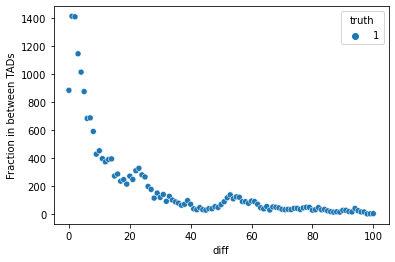

In [126]:
sns.scatterplot(data=d4[d4['truth']==1], x='diff', y='Fraction in between TADs', hue='truth')

<AxesSubplot:xlabel='diff', ylabel='Fraction in between TADs'>

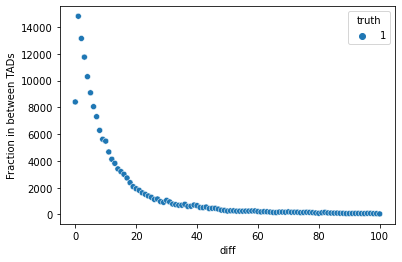

In [133]:
sns.scatterplot(data=d4[d4['truth']==1], x='diff', y='Fraction in between TADs', hue='truth')

In [136]:
d4[d4['truth']==1]

truth  diff       tissue  tad_h_coarse  Fraction in between TADs
202      1     0  Whole_Blood             1                      8404
204      1     1  Whole_Blood             1                     14807
206      1     2  Whole_Blood             1                     13148
208      1     3  Whole_Blood             1                     11754
210      1     4  Whole_Blood             1                     10292
..     ...   ...          ...           ...                       ...
394      1    96  Whole_Blood             1                        85
396      1    97  Whole_Blood             1                        85
398      1    98  Whole_Blood             1                        62
400      1    99  Whole_Blood             1                        63
402      1   100  Whole_Blood             1                        40

[101 rows x 5 columns]

In [138]:
d4[d4['truth']==1]

truth  diff       tissue  tad_h_coarse  Fraction in between TADs
203      1     0  Whole_Blood             0                       885
205      1     1  Whole_Blood             0                      1414
207      1     2  Whole_Blood             0                      1410
209      1     3  Whole_Blood             0                      1146
211      1     4  Whole_Blood             0                      1015
..     ...   ...          ...           ...                       ...
395      1    96  Whole_Blood             0                        16
397      1    97  Whole_Blood             0                        16
399      1    98  Whole_Blood             0                         2
401      1    99  Whole_Blood             0                         3
403      1   100  Whole_Blood             0                         4

[101 rows x 5 columns]

<AxesSubplot:xlabel='diff', ylabel='Fraction in between TADs'>

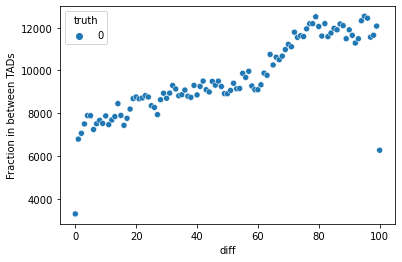

In [128]:
sns.scatterplot(data=d4[d4['truth']==0], x='diff', y='Fraction in between TADs', hue='truth')

<AxesSubplot:xlabel='diff', ylabel='Fraction in between TADs'>

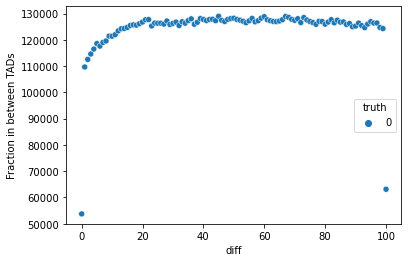

In [132]:
sns.scatterplot(data=d4[d4['truth']==0], x='diff', y='Fraction in between TADs', hue='truth')

In [114]:
df.groupby(['truth', 'diff', 'tissue'])['tad_h_coarse'].value_counts(normalize=True)

truth  diff  tissue       tad_h_coarse
0      0     Whole_Blood  1               0.942316
                          0               0.057684
       1     Whole_Blood  1               0.941704
                          0               0.058296
       2     Whole_Blood  1               0.940973
                                            ...   
1      98    Whole_Blood  0               0.031250
       99    Whole_Blood  1               0.954545
                          0               0.045455
       100   Whole_Blood  1               0.909091
                          0               0.090909
Name: tad_h_coarse, Length: 404, dtype: float64

In [97]:
lst2 = [1, 0, 1, 1, 1, 0, 1]
lst = ['Geeks', 'For', 'Geeks', 'is', 'portal', 'For', 'Geeks']
lst3 = ['G', 'F', 'G', 'G', 'G', 'F', 'G']
df = pd.DataFrame(list(zip(lst, lst2, lst3)),
               columns =['Name', 'val', 't2'])

In [107]:
df

Name  val t2
0   Geeks    1  G
1     For    0  F
2   Geeks    1  G
3      is    1  G
4  portal    1  G
5     For    0  F
6   Geeks    1  G

In [105]:
df.groupby(['Name'])['val'].value_counts()

Name    val
For     0      2
Geeks   1      3
is      1      1
portal  1      1
Name: val, dtype: int64

In [106]:
df.groupby(['t2'])['val'].value_counts(normalize=True)

t2  val
F   0      1.0
G   1      1.0
Name: val, dtype: float64

In [470]:
turth_pairs = pd.read_csv(f"{base_folder}/OnTAD-master/encode_tad/GSE106022_ENCFF311BGF_topologically_associated_domains_GRCh38.bed.gz", sep='\t|hg38-liftOver|-|:')

<ipython-input-470-430c145781da>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  turth_pairs = pd.read_csv(f"{base_folder}/OnTAD-master/encode_tad/GSE106022_ENCFF311BGF_topologically_associated_domains_GRCh38.bed.gz", sep='\t|hg38-liftOver|-|:')


In [471]:
turth_pairs

chr10   43544553   44464552   boundary.45|  |chr10  43544553.1  \
0     chr10   44424553   45064552   boundary.46|  |chr10    44424553   
1     chr10    3077809    3877808    boundary.2|  |chr10     3077809   
2     chr10    3837809    4837808    boundary.3|  |chr10     3837809   
3     chr10   69000245   69440244   boundary.73|  |chr10    69000245   
4     chr10   69400245   69480244   boundary.74|  |chr10    69400245   
...     ...        ...        ...            ...     ...         ...   
5389   chrX   25181884   34501883   boundary.25|   |chrX    25181884   
5390   chrX  129426024  134345970  boundary.145|   |chrX   129426024   
5391   chrX  118266038  129466023  boundary.131|   |chrX   118266038   
5392   chrX   63100531   72900166   boundary.64|   |chrX    63100531   
5393   chrX   80584502  100465002   boundary.85|   |chrX    80584502   

        43584552____boundary.46| |chr10.1   44424553  44464552.1  1.1495814007  
0       44464552____boundary.47|   |chr10   45024553    45064552      1.109159  
1         3117808____boundary.3|   |chr10    3837809     3877808      2.026904  
2         3877808____boundary.4|   |chr10    4797809     4837808      1.175242  
3       69040244____boundary.74|   |chr10   69400245    69440244      0.255503  
4       69440244____boundary.75|   |chr10   69440245    69480244      0.005857  
...                          ...      ...        ...         ...           ...  
5389    25221883____boundary.35|    |chrX   34461884    34501883      0.966006  
5390  129466023____boundary.151|    |chrX  134305971   134345970      2.266037  
5391  118306037____boundary.145|    |chrX  129426024   129466023      2.378836  
5392    63140532____boundary.77|    |chrX   72860138    72900166      1.552706  
5393   80624501____boundary.111|    |chrX  100425003   100465002      1.477161  

[5394 rows x 11 columns]